# Import of libraries & dataset

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import random

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

import tensorflow as tf
from tensorflow import keras
from keras import Input
from tensorflow.keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, MaxPool2D, BatchNormalization, Conv2D, MaxPooling2D, Flatten
#Image preprocessing
from keras.layers import Rescaling, Resizing, CenterCrop 
#Image augmentation
from keras.layers import RandomCrop, RandomFlip, RandomTranslation, RandomRotation, RandomZoom, RandomContrast

In [2]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
from sklearn.datasets import fetch_openml

data = fetch_openml('mnist_784', version = 1, cache = True, parser = 'auto')
x = data['data']
y = data['target']

# Loading functions

In [4]:
def show_confusion_matrix(labels_test, labels_predicted):
    plt.figure(figsize = (10,7))
    sb.heatmap(
        confusion_matrix(labels_test, labels_predicted),
        annot = True, fmt = 'd')
    plt.xlabel('Predicted')
    plt.ylabel('Truth')

def show_training_history(history):
    fig, ax = plt.subplots(2, 1)
    ax[0].plot(history.history['loss'], color = 'b', label = 'Training loss')
    ax[0].plot(history.history['val_loss'], color = 'r', label = 'Validation loss', axes = ax[0])
    legend = ax[0].legend(loc = 'best', shadow = True)
    ax[1].plot(history.history['accuracy'], color = 'b', label = 'Training accuracy')
    ax[1].plot(history.history['val_accuracy'], color = 'r',label = 'Validation accuracy')
    legend = ax[1].legend(loc = 'best', shadow = True)

# Inspecting dataset

In [5]:
x

pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9   
0           0       0       0       0       0       0       0       0       0  \
1           0       0       0       0       0       0       0       0       0   
2           0       0       0       0       0       0       0       0       0   
3           0       0       0       0       0       0       0       0       0   
4           0       0       0       0       0       0       0       0       0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
69995       0       0       0       0       0       0       0       0       0   
69996       0       0       0       0       0       0       0       0       0   
69997       0       0       0       0       0       0       0       0       0   
69998       0       0       0       0       0       0       0       0       0   
69999       0       0       0       0       0       0       0       0       0   

       pixel10  ...  pixel775  pixel776  pixel777  pixel778  pixel779   
0            0  ...         0         0         0         0         0  \
1            0  ...         0         0         0         0         0   
2            0  ...         0         0         0         0         0   
3            0  ...         0         0         0         0         0   
4            0  ...         0         0         0         0         0   
...        ...  ...       ...       ...       ...       ...       ...   
69995        0  ...         0         0         0         0         0   
69996        0  ...         0         0         0         0         0   
69997        0  ...         0         0         0         0         0   
69998        0  ...         0         0         0         0         0   
69999        0  ...         0         0         0         0         0   

       pixel780  pixel781  pixel782  pixel783  pixel784  
0             0         0         0         0         0  
1             0         0         0         0         0  
2             0         0         0         0         0  
3             0         0         0         0         0  
4             0         0         0         0         0  
...         ...       ...       ...       ...       ...  
69995         0         0         0         0         0  
69996         0         0         0         0         0  
69997         0         0         0         0         0  
69998         0         0         0         0         0  
69999         0         0         0         0         0  

[70000 rows x 784 columns]

In [7]:
x.duplicated().sum()

0

In [8]:
x.isna().sum()

pixel1      0
pixel2      0
pixel3      0
pixel4      0
pixel5      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 784, dtype: int64

In [9]:
x.isna().sum().sum()

0

In [10]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 784 entries, pixel1 to pixel784
dtypes: int64(784)
memory usage: 418.7 MB


In [11]:
x.dtypes

pixel1      int64
pixel2      int64
pixel3      int64
pixel4      int64
pixel5      int64
            ...  
pixel780    int64
pixel781    int64
pixel782    int64
pixel783    int64
pixel784    int64
Length: 784, dtype: object

In [12]:
x.describe()

pixel1   pixel2   pixel3   pixel4   pixel5   pixel6   pixel7   pixel8  \
count  70000.0  70000.0  70000.0  70000.0  70000.0  70000.0  70000.0  70000.0   
mean       0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
std        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
min        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
25%        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
50%        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
75%        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
max        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

        pixel9  pixel10  ...      pixel775      pixel776      pixel777  \
count  70000.0  70000.0  ...  70000.000000  70000.000000  70000.000000   
mean       0.0      0.0  ...      0.197414      0.099543      0.046629   
std        0.0      0.0  ...      5.991206      4.256304      2.783732   
min        0.0      0.0  ...      0.000000      0.000000      0.000000   
25%        0.0      0.0  ...      0.000000      0.000000      0.000000   
50%        0.0      0.0  ...      0.000000      0.000000      0.000000   
75%        0.0      0.0  ...      0.000000      0.000000      0.000000   
max        0.0      0.0  ...    254.000000    254.000000    253.000000   

           pixel778      pixel779      pixel780  pixel781  pixel782  pixel783  \
count  70000.000000  70000.000000  70000.000000   70000.0   70000.0   70000.0   
mean       0.016614      0.012957      0.001714       0.0       0.0       0.0   
std        1.561822      1.553796      0.320889       0.0       0.0       0.0   
min        0.000000      0.000000      0.000000       0.0       0.0       0.0   
25%        0.000000      0.000000      0.000000       0.0       0.0       0.0   
50%        0.000000      0.000000      0.000000       0.0       0.0       0.0   
75%        0.000000      0.000000      0.000000       0.0       0.0       0.0   
max      253.000000    254.000000     62.000000       0.0       0.0       0.0   

       pixel784  
count   70000.0  
mean        0.0  
std         0.0  
min         0.0  
25%         0.0  
50%         0.0  
75%         0.0  
max         0.0  

[8 rows x 784 columns]

In [13]:
print(f'mean: {x.mean().min():.3f} - {x.mean().max():.3f}')
print(f' std: {x.std().min():.3f} - {x.std().max():.3f}')
print(f' min: {x.min().min():.3f}')
print(f' max: {x.max().max():.3f}')

mean: 0.000 - 140.015
 std: 0.000 - 113.886
 min: 0.000
 max: 255.000


In [6]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 70000 entries, 0 to 69999
Series name: class
Non-Null Count  Dtype   
--------------  -----   
70000 non-null  category
dtypes: category(1)
memory usage: 68.9 KB


In [15]:
y.isna().sum()

0

In [16]:
y.value_counts()

class
1    7877
7    7293
3    7141
2    6990
9    6958
0    6903
6    6876
8    6825
4    6824
5    6313
Name: count, dtype: int64

<Axes: title={'center': 'Classes distribution'}, xlabel='class', ylabel='Count'>

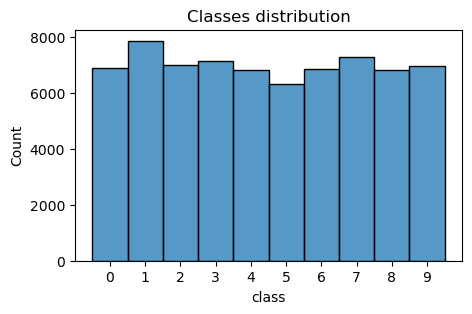

In [17]:
plt.figure(figsize = (5, 3))
plt.title('Classes distribution')
sb.histplot(y, discrete = True)

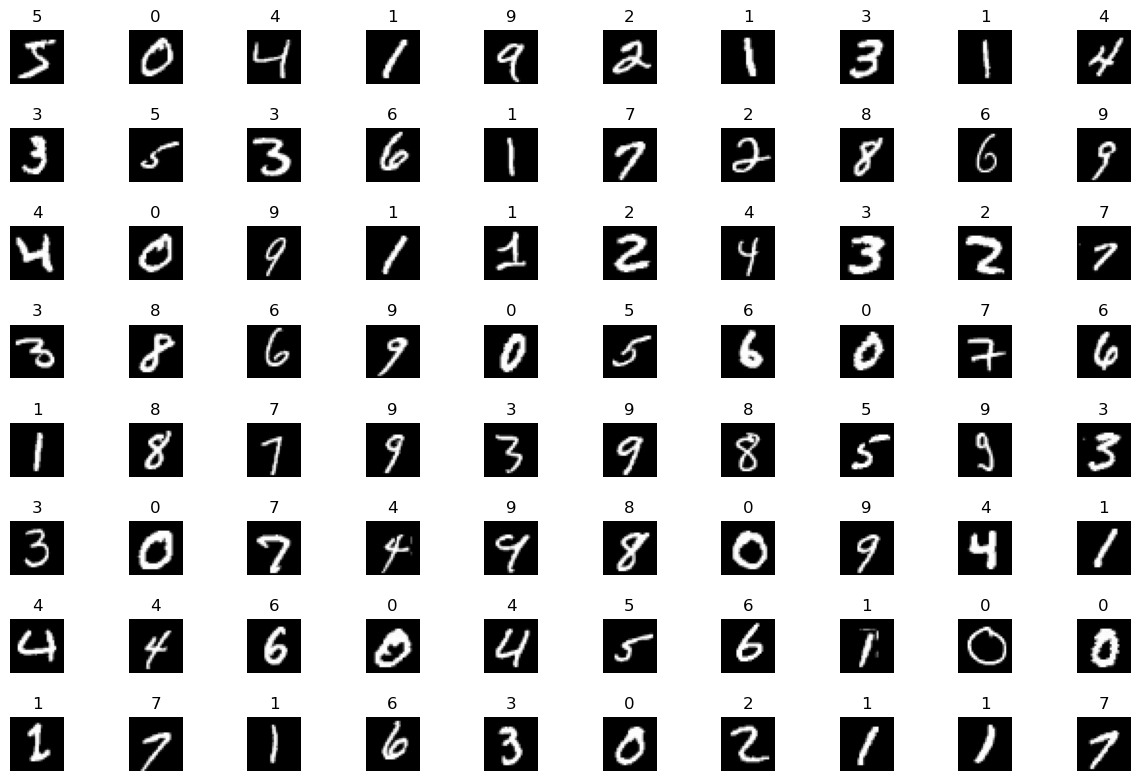

In [31]:
plt.subplots(8, 10, figsize = (12, 8))
plt.tight_layout()
for i in range(0, 80):
    plt.subplot(8, 10, i + 1)
    plt.axis('off')
    plt.gca().set_title(y[i])
    plt.imshow(x.iloc[[i]].to_numpy().reshape(28, 28), cmap = 'gray')
plt.show()  

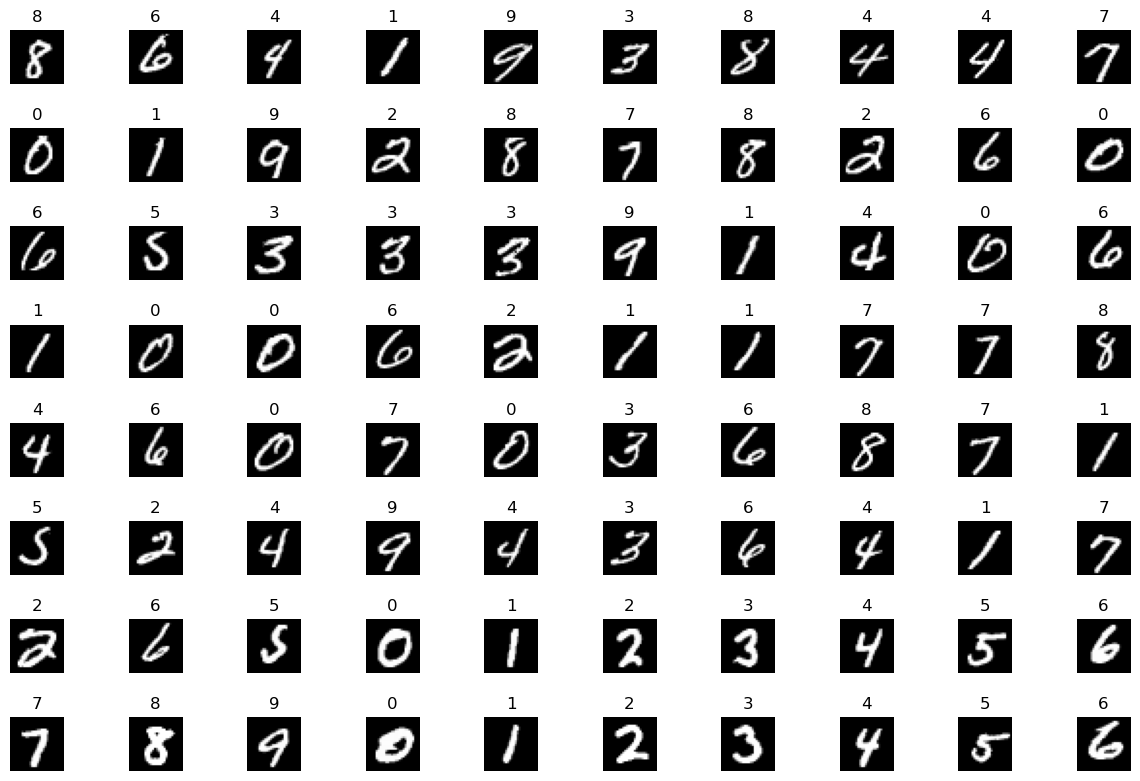

In [32]:
plt.subplots(8, 10, figsize = (12, 8))
plt.tight_layout()
i = 0
for element_number in range(len(x) - 80, len(x)):
    plt.subplot(8, 10, i + 1)
    plt.axis('off')        
    plt.gca().set_title(y[element_number])     
    plt.imshow(x.iloc[[element_number]].to_numpy().reshape(28, 28), cmap = 'gray')
    i += 1
plt.show()  

# Preprocessing

In [5]:
y_int = y.astype(np.int8)
y_int

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: int8

In [6]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
x_scaled = pd.DataFrame(x_scaled, columns = x.columns.values)
x_scaled

pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9   
0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0  \
1         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
69995     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69996     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69997     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69998     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69999     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

       pixel10  ...  pixel775  pixel776  pixel777  pixel778  pixel779   
0          0.0  ...       0.0       0.0       0.0       0.0       0.0  \
1          0.0  ...       0.0       0.0       0.0       0.0       0.0   
2          0.0  ...       0.0       0.0       0.0       0.0       0.0   
3          0.0  ...       0.0       0.0       0.0       0.0       0.0   
4          0.0  ...       0.0       0.0       0.0       0.0       0.0   
...        ...  ...       ...       ...       ...       ...       ...   
69995      0.0  ...       0.0       0.0       0.0       0.0       0.0   
69996      0.0  ...       0.0       0.0       0.0       0.0       0.0   
69997      0.0  ...       0.0       0.0       0.0       0.0       0.0   
69998      0.0  ...       0.0       0.0       0.0       0.0       0.0   
69999      0.0  ...       0.0       0.0       0.0       0.0       0.0   

       pixel780  pixel781  pixel782  pixel783  pixel784  
0           0.0       0.0       0.0       0.0       0.0  
1           0.0       0.0       0.0       0.0       0.0  
2           0.0       0.0       0.0       0.0       0.0  
3           0.0       0.0       0.0       0.0       0.0  
4           0.0       0.0       0.0       0.0       0.0  
...         ...       ...       ...       ...       ...  
69995       0.0       0.0       0.0       0.0       0.0  
69996       0.0       0.0       0.0       0.0       0.0  
69997       0.0       0.0       0.0       0.0       0.0  
69998       0.0       0.0       0.0       0.0       0.0  
69999       0.0       0.0       0.0       0.0       0.0  

[70000 rows x 784 columns]

In [9]:
print(f'mean: {x_scaled.mean().min():.3f} - {x_scaled.mean().max():.3f}')
print(f' std: {x_scaled.std().min():.3f} - {x_scaled.std().max():.3f}')
print(f' min: {x_scaled.min().min():.3f}')
print(f' max: {x_scaled.max().max():.3f}')

mean: 0.000 - 0.549
 std: 0.000 - 0.447
 min: 0.000
 max: 1.000


# Dataset split for train & test

In [7]:
x_train_, x_test, y_train_, y_test = train_test_split(x_scaled, y_int, test_size = 0.20, random_state = 42, shuffle = True)
x_train, x_validation, y_train, y_validation = train_test_split(x_train_, y_train_, test_size = 0.05, random_state = 42)

y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)
y_validation_categorical = to_categorical(y_validation)

print(f'x train: {x_train.shape}')
print(f'y train: {y_train.shape}')
print()
print(f'x test: {x_test.shape}')
print(f'y test: {y_test.shape}')
print()
print(f'x validation: {x_validation.shape}')
print(f'y validation: {y_validation.shape}')

x train: (53200, 784)
y train: (53200,)

x test: (14000, 784)
y test: (14000,)

x validation: (2800, 784)
y validation: (2800,)


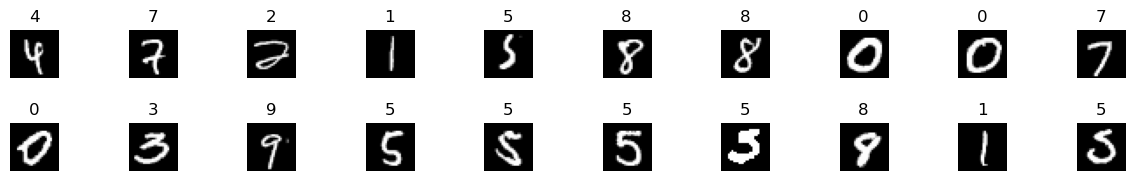

In [60]:
plt.subplots(2, 10, figsize = (12, 2))
plt.tight_layout()
for i in range(0, 20):
    plt.subplot(2, 10, i + 1)
    plt.axis('off')
    plt.gca().set_title(y_train.iloc[i])
    plt.imshow(x_train.iloc[[i]].to_numpy().reshape(28, 28), cmap = 'gray')
plt.show() 

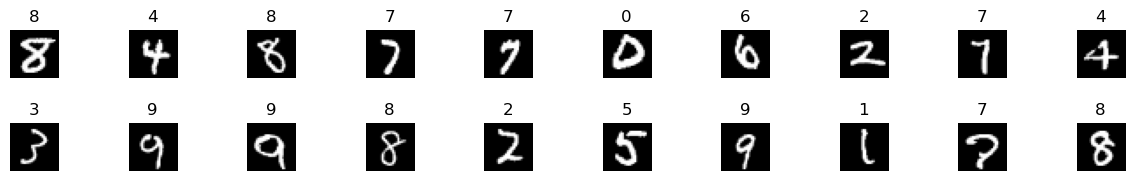

In [61]:
plt.subplots(2, 10, figsize = (12, 2))
plt.tight_layout()
for i in range(0, 20):
    plt.subplot(2, 10, i + 1)
    plt.axis('off')
    plt.gca().set_title(y_test.iloc[i])
    plt.imshow(x_test.iloc[[i]].to_numpy().reshape(28, 28), cmap = 'gray')
plt.show() 

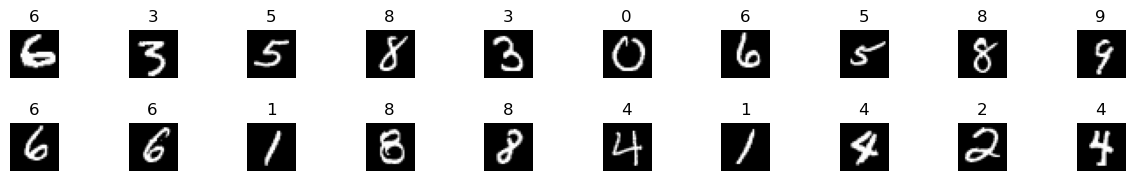

In [62]:
plt.subplots(2, 10, figsize = (12, 2))
plt.tight_layout()
for i in range(0, 20):
    plt.subplot(2, 10, i + 1)
    plt.axis('off')
    plt.gca().set_title(y_validation.iloc[i])
    plt.imshow(x_validation.iloc[[i]].to_numpy().reshape(28, 28), cmap = 'gray')
plt.show() 

# Classification

## K-nearest neighbors classifier

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1343
           1       0.96      1.00      0.97      1600
           2       0.98      0.96      0.97      1380
           3       0.96      0.97      0.97      1433
           4       0.97      0.97      0.97      1295
           5       0.97      0.97      0.97      1273
           6       0.98      0.99      0.98      1396
           7       0.96      0.97      0.97      1503
           8       0.99      0.93      0.96      1357
           9       0.95      0.96      0.96      1420

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000



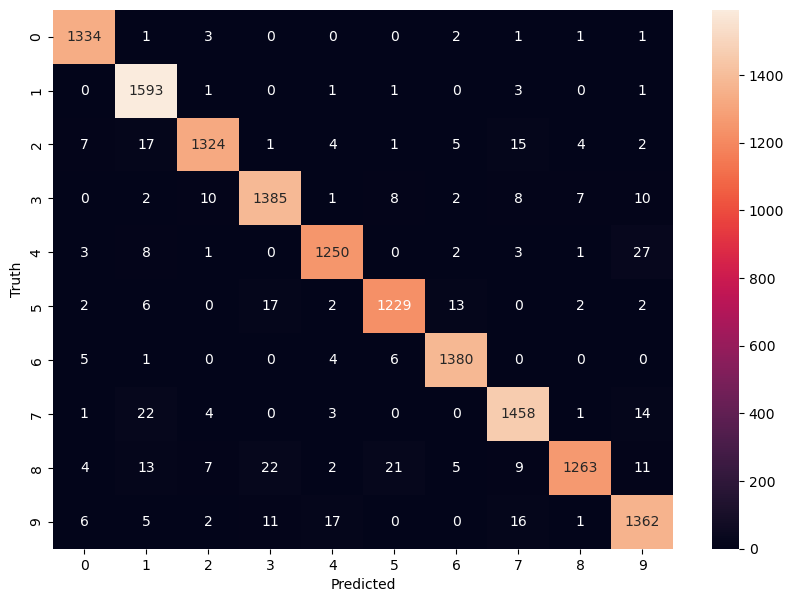

In [15]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train, y_train)
y_predicted_knn = knn.predict(x_test)
print(classification_report(y_test, y_predicted_knn))
show_confusion_matrix(y_test, y_predicted_knn)

## Decision tree

              precision    recall  f1-score   support

           0       0.93      0.92      0.92      1343
           1       0.94      0.95      0.95      1600
           2       0.85      0.85      0.85      1380
           3       0.83      0.84      0.84      1433
           4       0.84      0.87      0.86      1295
           5       0.83      0.82      0.82      1273
           6       0.90      0.90      0.90      1396
           7       0.90      0.91      0.90      1503
           8       0.82      0.79      0.80      1357
           9       0.84      0.84      0.84      1420

    accuracy                           0.87     14000
   macro avg       0.87      0.87      0.87     14000
weighted avg       0.87      0.87      0.87     14000



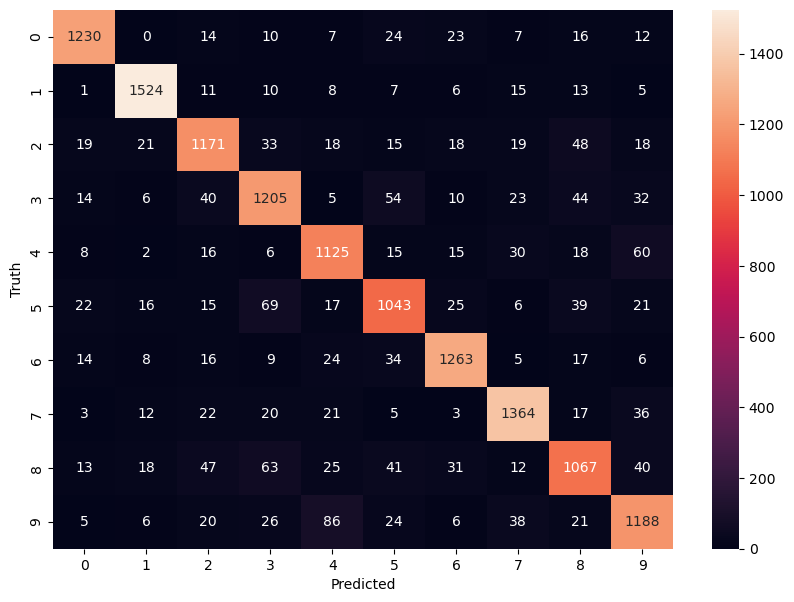

In [36]:
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)
y_predicted_from_tree = tree.predict(x_test)
print(classification_report(y_test, y_predicted_from_tree))
show_confusion_matrix(y_test, y_predicted_from_tree)

## Logistic regression

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1343
           1       0.95      0.97      0.96      1600
           2       0.92      0.90      0.91      1380
           3       0.90      0.89      0.90      1433
           4       0.92      0.93      0.92      1295
           5       0.88      0.89      0.88      1273
           6       0.94      0.95      0.95      1396
           7       0.93      0.94      0.94      1503
           8       0.90      0.87      0.88      1357
           9       0.90      0.90      0.90      1420

    accuracy                           0.92     14000
   macro avg       0.92      0.92      0.92     14000
weighted avg       0.92      0.92      0.92     14000



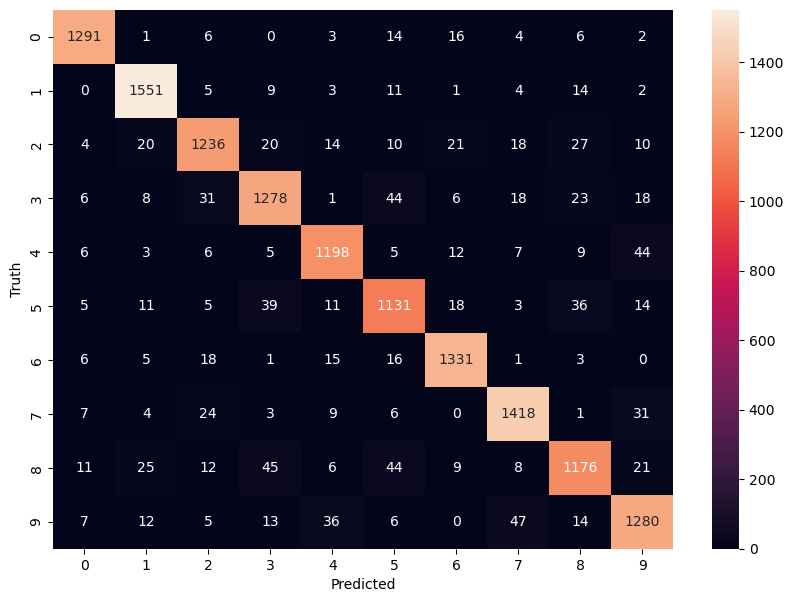

In [114]:
log_reg = LogisticRegression(solver = 'newton-cg', max_iter = 50, random_state = 42) 
log_reg.fit(x_train, y_train)
y_predicted_from_log_reg = log_reg.predict(x_test)
print(classification_report(y_test, y_predicted_from_log_reg))
show_confusion_matrix(y_test, y_predicted_from_log_reg)

## Grid search for logistic regression

C:\Users\dexp\miniconda3\envs\env-tf\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting 5 folds for each of 9 candidates, totalling 45 fits


C:\Users\dexp\miniconda3\envs\env-tf\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best parameters: {'C': 0.5, 'solver': 'saga'}
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1343
           1       0.95      0.97      0.96      1600
           2       0.91      0.90      0.91      1380
           3       0.90      0.90      0.90      1433
           4       0.92      0.92      0.92      1295
           5       0.88      0.88      0.88      1273
           6       0.95      0.95      0.95      1396
           7       0.93      0.94      0.93      1503
           8       0.89      0.87      0.88      1357
           9       0.90      0.90      0.90      1420

    accuracy                           0.92     14000
   macro avg       0.92      0.92      0.92     14000
weighted avg       0.92      0.92      0.92     14000



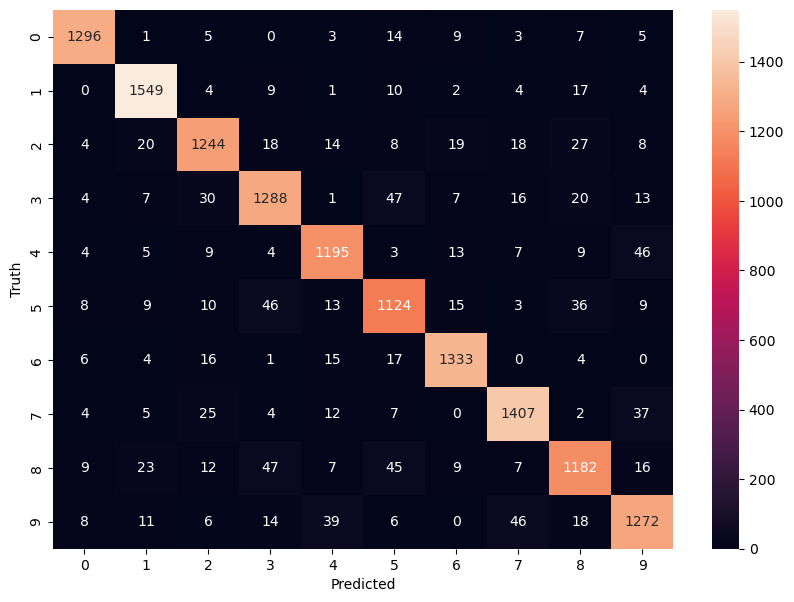

In [67]:
parameters_log_reg = {
    'solver': ['newton-cg', 'lbfgs', 'saga'],
    'C': [0.5, 0.75, 1]
}

log_reg_gridsearch = LogisticRegression(max_iter = 50, random_state = 42) 
log_reg_gridsearch.fit(x_train, y_train)
gs_log_reg = GridSearchCV(estimator = log_reg_gridsearch, param_grid = parameters_log_reg, n_jobs = -1, verbose = 4)     
gs_log_reg.fit(x_train, y_train)

print(f'Best parameters: {gs_log_reg.best_params_}')
log_reg_gridsearch.set_params(**gs_log_reg.best_params_)

y_predicted_from_log_reg_gridsearch = log_reg_gridsearch.predict(x_test)
print(classification_report(y_test, y_predicted_from_log_reg_gridsearch))
show_confusion_matrix(y_test, y_predicted_from_log_reg_gridsearch)

## Linear SVC

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1343
           1       0.94      0.98      0.96      1600
           2       0.90      0.89      0.90      1380
           3       0.89      0.89      0.89      1433
           4       0.91      0.92      0.92      1295
           5       0.87      0.87      0.87      1273
           6       0.94      0.95      0.95      1396
           7       0.93      0.94      0.93      1503
           8       0.88      0.83      0.86      1357
           9       0.89      0.88      0.89      1420

    accuracy                           0.91     14000
   macro avg       0.91      0.91      0.91     14000
weighted avg       0.91      0.91      0.91     14000



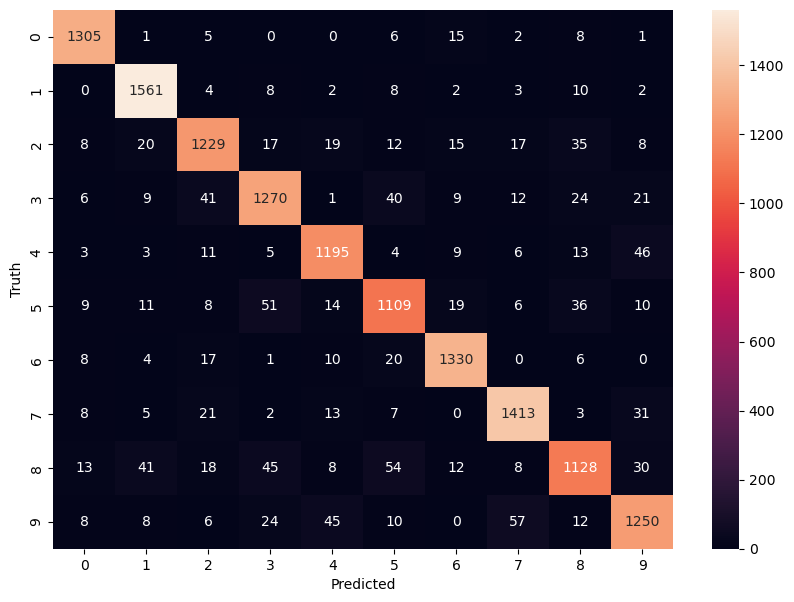

In [53]:
linear_svc = LinearSVC(dual = False, random_state = 42, tol = 1e-3)
linear_svc.fit(x_train, y_train)
y_predicted_from_linear_svc = linear_svc.predict(x_test)
print(classification_report(y_test, y_predicted_from_linear_svc))
show_confusion_matrix(y_test, y_predicted_from_linear_svc)

## Support vector classifier

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1343
           1       0.98      0.99      0.99      1600
           2       0.97      0.97      0.97      1380
           3       0.97      0.97      0.97      1433
           4       0.97      0.98      0.98      1295
           5       0.98      0.97      0.97      1273
           6       0.98      0.99      0.99      1396
           7       0.97      0.97      0.97      1503
           8       0.97      0.96      0.97      1357
           9       0.97      0.96      0.97      1420

    accuracy                           0.98     14000
   macro avg       0.98      0.98      0.98     14000
weighted avg       0.98      0.98      0.98     14000



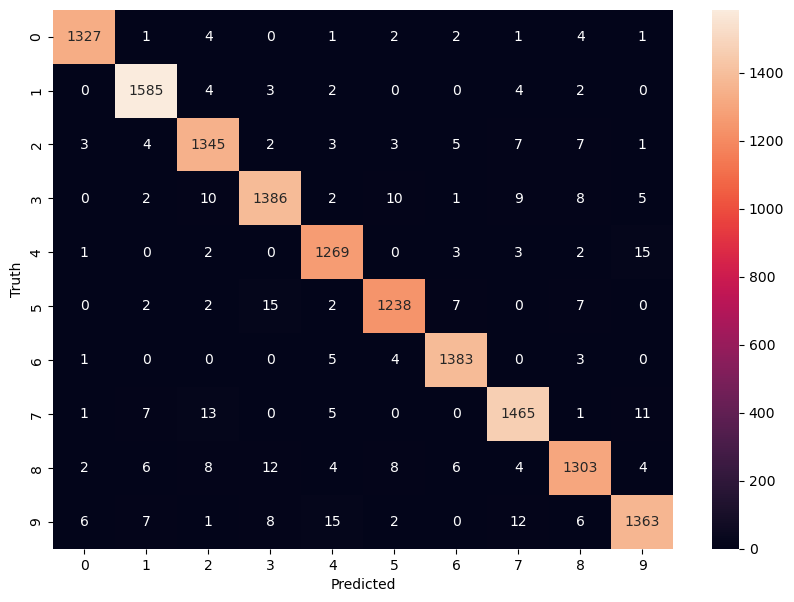

In [56]:
svc = SVC()
svc.fit(x_train, y_train)
y_predicted_from_svc = svc.predict(x_test)
print(classification_report(y_test, y_predicted_from_svc))
show_confusion_matrix(y_test, y_predicted_from_svc)

## SGD classifier

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1343
           1       0.95      0.97      0.96      1600
           2       0.88      0.91      0.90      1380
           3       0.93      0.86      0.90      1433
           4       0.91      0.91      0.91      1295
           5       0.90      0.86      0.88      1273
           6       0.94      0.95      0.95      1396
           7       0.91      0.95      0.93      1503
           8       0.87      0.87      0.87      1357
           9       0.88      0.89      0.88      1420

    accuracy                           0.92     14000
   macro avg       0.91      0.91      0.91     14000
weighted avg       0.92      0.92      0.92     14000



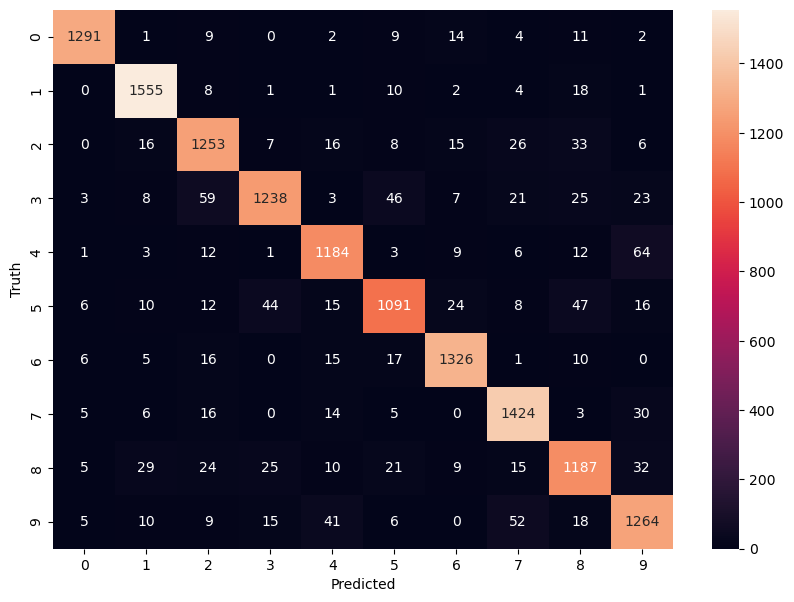

In [58]:
sgdc = SGDClassifier(n_jobs = -1, random_state = 42)
sgdc.fit(x_train, y_train)
y_predicted_from_sgdc = sgdc.predict(x_test)
print(classification_report(y_test, y_predicted_from_sgdc))
show_confusion_matrix(y_test, y_predicted_from_sgdc)

## Grid search for SGD

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best parameters: {'loss': 'log_loss', 'penalty': 'elasticnet'}
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1343
           1       0.95      0.97      0.96      1600
           2       0.88      0.91      0.90      1380
           3       0.93      0.86      0.90      1433
           4       0.91      0.91      0.91      1295
           5       0.90      0.86      0.88      1273
           6       0.94      0.95      0.95      1396
           7       0.91      0.95      0.93      1503
           8       0.87      0.87      0.87      1357
           9       0.88      0.89      0.88      1420

    accuracy                           0.92     14000
   macro avg       0.91      0.91      0.91     14000
weighted avg       0.92      0.92      0.92     14000



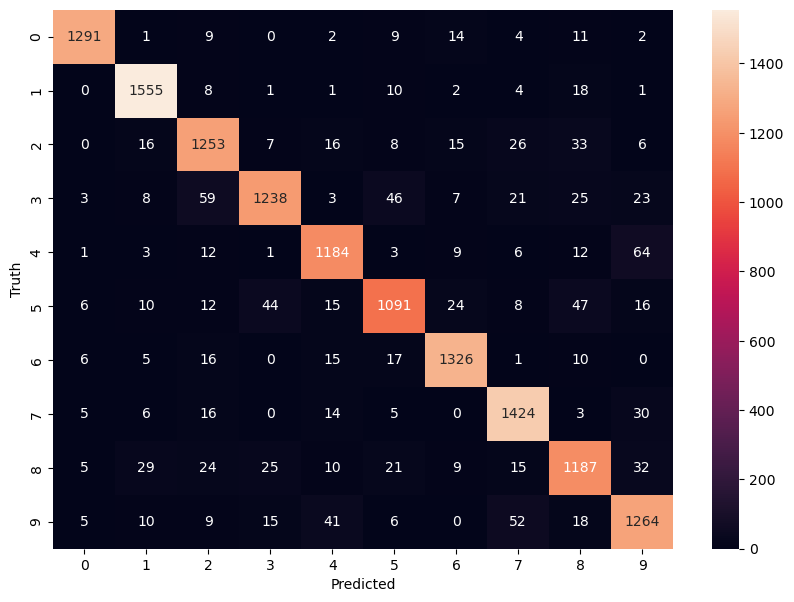

In [59]:
parameters_sgd = {
    'loss': ['hinge', 'log_loss', 'perceptron'],
    'penalty': ['l2', 'l1', 'elasticnet']
}

sgdc_gridsearch = SGDClassifier(n_jobs = -1, random_state = 42)
sgdc_gridsearch.fit(x_train, y_train)
gs_sgdc = GridSearchCV(estimator = sgdc_gridsearch, param_grid = parameters_sgd, n_jobs = -1, verbose = 4)     
gs_sgdc.fit(x_train, y_train)

print(f'Best parameters: {gs_sgdc.best_params_}')
sgdc_gridsearch.set_params(**gs_sgdc.best_params_)

y_predicted_from_sgdc_gridsearch = sgdc_gridsearch.predict(x_test)
print(classification_report(y_test, y_predicted_from_sgdc_gridsearch))
show_confusion_matrix(y_test, y_predicted_from_sgdc_gridsearch)

## Random forest classifier

### - w/o bootstrap

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1343
           1       0.99      0.99      0.99      1600
           2       0.95      0.97      0.96      1380
           3       0.96      0.95      0.96      1433
           4       0.97      0.97      0.97      1295
           5       0.97      0.97      0.97      1273
           6       0.98      0.99      0.99      1396
           7       0.97      0.97      0.97      1503
           8       0.96      0.96      0.96      1357
           9       0.96      0.96      0.96      1420

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000



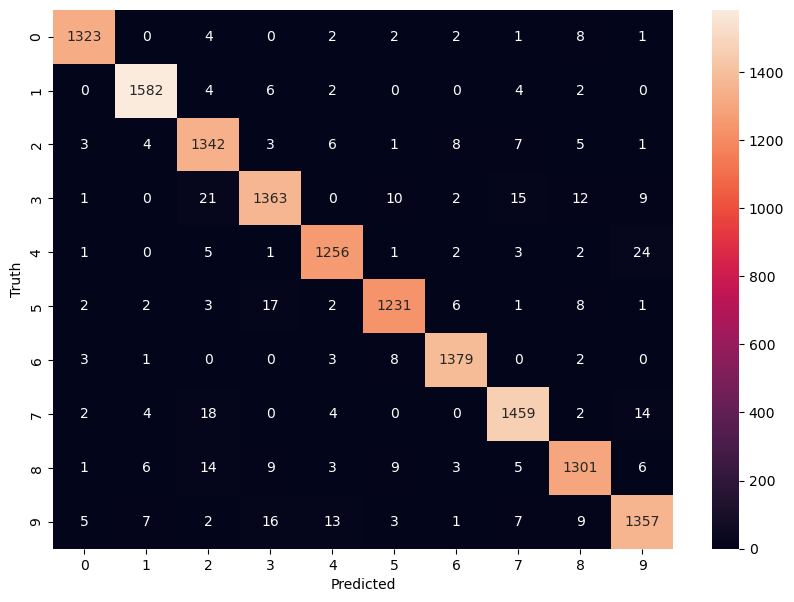

In [60]:
forest = RandomForestClassifier(bootstrap = False, random_state = 42, n_jobs = -1)
forest.fit(x_train, y_train)
y_predicted_from_forest = forest.predict(x_test)
print(classification_report(y_test, y_predicted_from_forest))
show_confusion_matrix(y_test, y_predicted_from_forest)

### - with bootstrap

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1343
           1       0.98      0.98      0.98      1600
           2       0.95      0.97      0.96      1380
           3       0.96      0.95      0.96      1433
           4       0.96      0.97      0.97      1295
           5       0.97      0.96      0.96      1273
           6       0.98      0.98      0.98      1396
           7       0.96      0.96      0.96      1503
           8       0.96      0.96      0.96      1357
           9       0.95      0.95      0.95      1420

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000



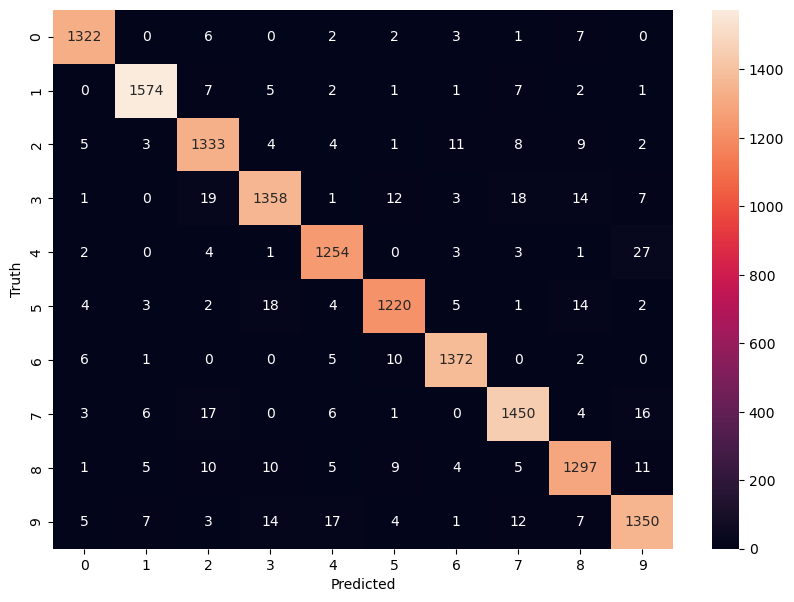

In [174]:
forest_bootstrap = RandomForestClassifier(bootstrap = True, random_state = 42, n_jobs = -1)
forest_bootstrap.fit(x_train, y_train)
y_predicted_from_forest_bootstrap = forest_bootstrap.predict(x_test)
print(classification_report(y_test, y_predicted_from_forest_bootstrap))
show_confusion_matrix(y_test, y_predicted_from_forest_bootstrap)

## Grid search for Random forest

### - w/o bootstrap

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters: {'max_depth': 16, 'n_estimators': 400}
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1343
           1       0.98      0.99      0.99      1600
           2       0.95      0.97      0.96      1380
           3       0.97      0.95      0.96      1433
           4       0.97      0.97      0.97      1295
           5       0.98      0.97      0.97      1273
           6       0.98      0.98      0.98      1396
           7       0.97      0.97      0.97      1503
           8       0.96      0.96      0.96      1357
           9       0.96      0.95      0.95      1420

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000



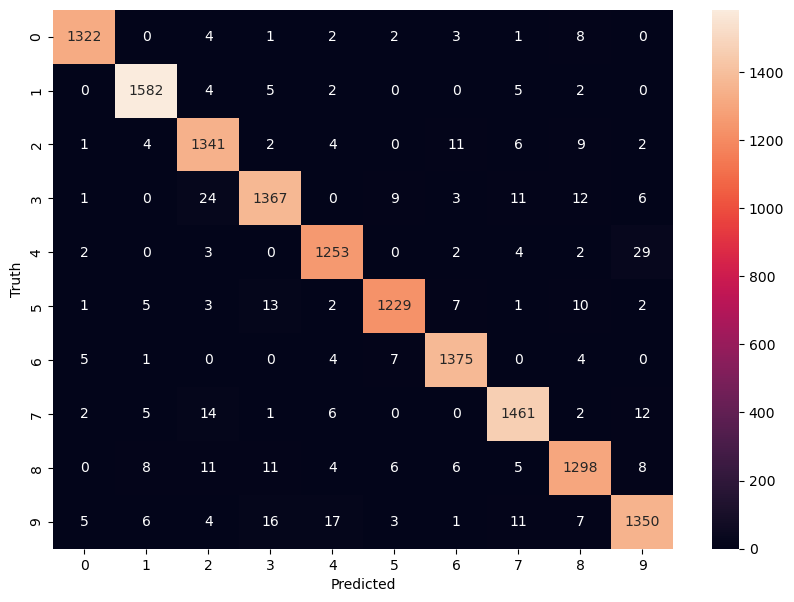

In [68]:
parameters_forest = {
    'n_estimators': [200, 400],
    'max_depth': [8, 12, 16]
}

forest_for_grid_search = RandomForestClassifier(bootstrap = False, random_state = 42, n_jobs = -1, criterion = 'entropy')
forest_for_grid_search.fit(x_train, y_train)
gs_forest = GridSearchCV(estimator = forest_for_grid_search, param_grid = parameters_forest, n_jobs = -1, verbose = 4)     
gs_forest.fit(x_train, y_train)

print(f'Best parameters: {gs_forest.best_params_}')
forest_for_grid_search.set_params(**gs_forest.best_params_)

y_predicted_from_forest_gridsearch = forest_for_grid_search.predict(x_test)
print(classification_report(y_test, y_predicted_from_forest_gridsearch))
show_confusion_matrix(y_test, y_predicted_from_forest_gridsearch)

### - with bootstrap

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters: {'max_depth': 16, 'n_estimators': 400}
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1343
           1       0.98      0.99      0.98      1600
           2       0.95      0.97      0.96      1380
           3       0.96      0.95      0.95      1433
           4       0.97      0.96      0.96      1295
           5       0.97      0.96      0.96      1273
           6       0.97      0.98      0.98      1396
           7       0.96      0.97      0.96      1503
           8       0.96      0.95      0.95      1357
           9       0.95      0.95      0.95      1420

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000



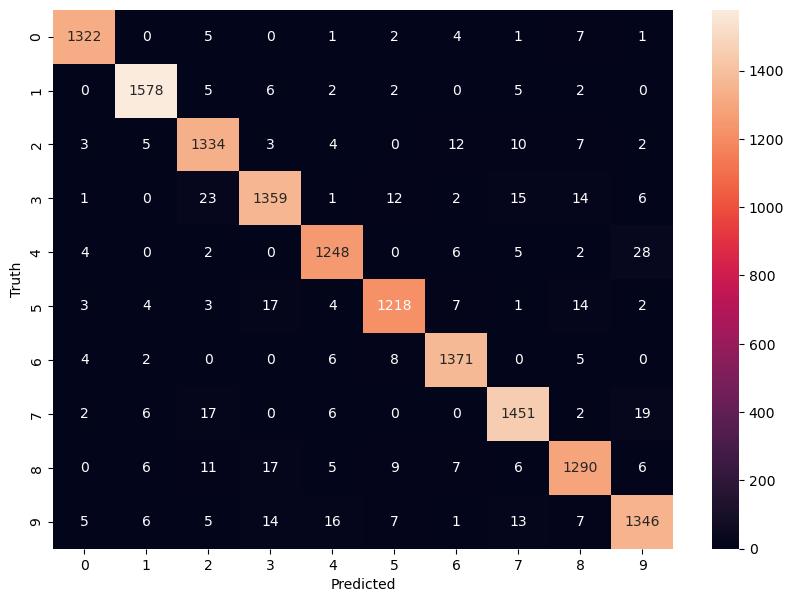

In [69]:
forest_for_grid_search_2 = RandomForestClassifier(bootstrap = True, random_state = 42, n_jobs = -1, criterion = 'entropy')
forest_for_grid_search_2.fit(x_train, y_train)
gs_forest_2 = GridSearchCV(estimator = forest_for_grid_search_2, param_grid = parameters_forest, n_jobs = -1, verbose = 4)     
gs_forest_2.fit(x_train, y_train)

print(f'Best parameters: {gs_forest_2.best_params_}')
forest_for_grid_search_2.set_params(**gs_forest_2.best_params_)

y_predicted_from_forest_gridsearch_2 = forest_for_grid_search_2.predict(x_test)
print(classification_report(y_test, y_predicted_from_forest_gridsearch_2))
show_confusion_matrix(y_test, y_predicted_from_forest_gridsearch_2)

## Extra trees classifier

### - w/o bootstrap

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1343
           1       0.99      0.99      0.99      1600
           2       0.96      0.97      0.97      1380
           3       0.96      0.95      0.96      1433
           4       0.97      0.97      0.97      1295
           5       0.98      0.96      0.97      1273
           6       0.98      0.99      0.98      1396
           7       0.97      0.97      0.97      1503
           8       0.96      0.95      0.96      1357
           9       0.95      0.95      0.95      1420

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000



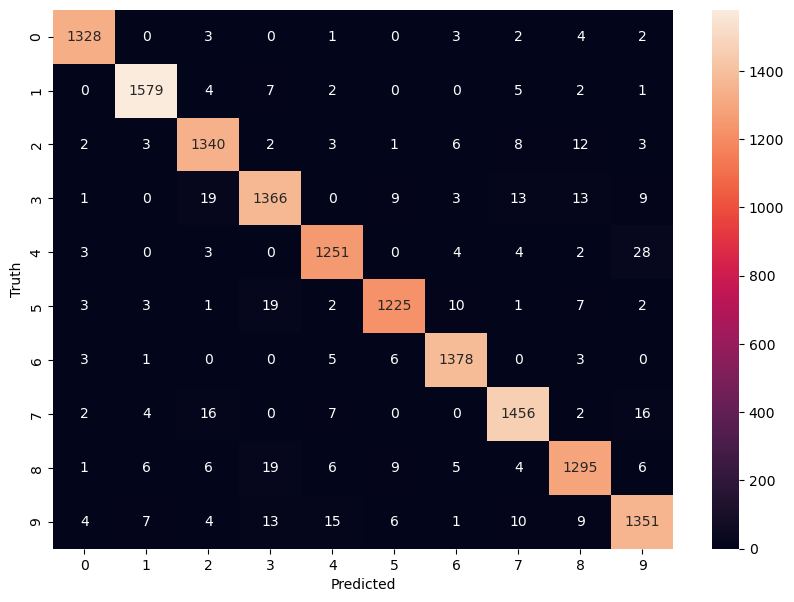

In [70]:
extra_trees = ExtraTreesClassifier(bootstrap = False, random_state = 42, n_jobs = -1)
extra_trees.fit(x_train, y_train)
y_predicted_from_extra_trees = extra_trees.predict(x_test)
print(classification_report(y_test, y_predicted_from_extra_trees))
show_confusion_matrix(y_test, y_predicted_from_extra_trees)

### - with bootstrap

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1343
           1       0.98      0.98      0.98      1600
           2       0.95      0.96      0.96      1380
           3       0.95      0.95      0.95      1433
           4       0.96      0.96      0.96      1295
           5       0.97      0.96      0.96      1273
           6       0.97      0.98      0.98      1396
           7       0.97      0.97      0.97      1503
           8       0.96      0.95      0.95      1357
           9       0.95      0.95      0.95      1420

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000



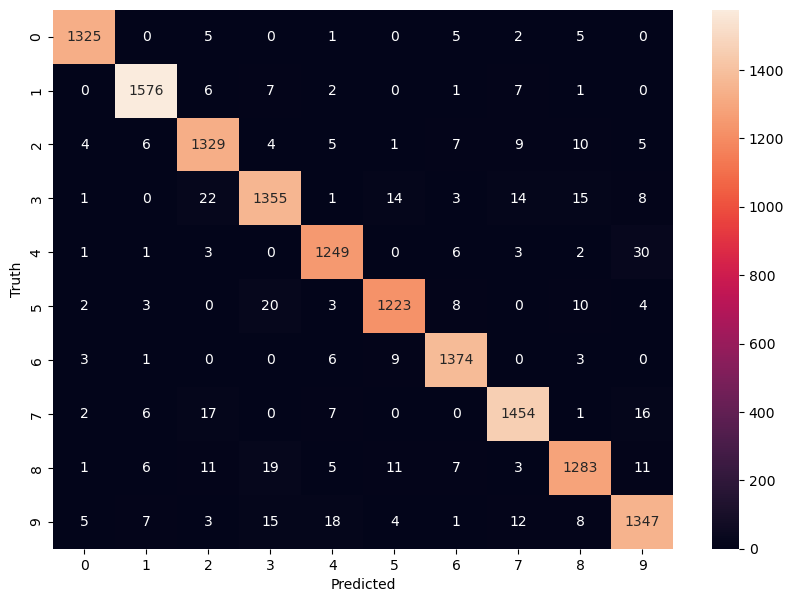

In [71]:
extra_trees_bootstrap = ExtraTreesClassifier(bootstrap = True, random_state = 42, n_jobs = -1)
extra_trees_bootstrap.fit(x_train, y_train)
y_predicted_from_extra_trees_bootstrap = extra_trees_bootstrap.predict(x_test)
print(classification_report(y_test, y_predicted_from_extra_trees_bootstrap))
show_confusion_matrix(y_test, y_predicted_from_extra_trees_bootstrap)

## Bagging classifier

### - w/o bootstrap

              precision    recall  f1-score   support

           0       0.92      0.93      0.93      1343
           1       0.94      0.96      0.95      1600
           2       0.87      0.86      0.87      1380
           3       0.84      0.84      0.84      1433
           4       0.86      0.89      0.87      1295
           5       0.84      0.84      0.84      1273
           6       0.91      0.91      0.91      1396
           7       0.92      0.92      0.92      1503
           8       0.84      0.80      0.82      1357
           9       0.85      0.84      0.85      1420

    accuracy                           0.88     14000
   macro avg       0.88      0.88      0.88     14000
weighted avg       0.88      0.88      0.88     14000



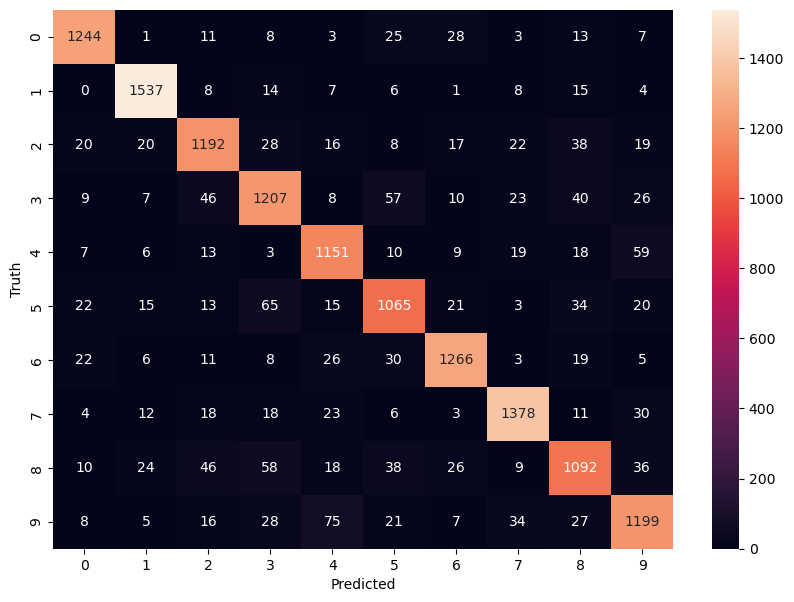

In [72]:
bagging = BaggingClassifier(bootstrap = False, random_state = 42, n_jobs = -1)
bagging.fit(x_train, y_train)
y_predicted_from_bagging = bagging.predict(x_test)
print(classification_report(y_test, y_predicted_from_bagging))
show_confusion_matrix(y_test, y_predicted_from_bagging)

### - with bootstrap

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1343
           1       0.97      0.98      0.98      1600
           2       0.92      0.95      0.93      1380
           3       0.93      0.92      0.92      1433
           4       0.94      0.95      0.94      1295
           5       0.93      0.93      0.93      1273
           6       0.97      0.96      0.96      1396
           7       0.96      0.95      0.96      1503
           8       0.93      0.90      0.91      1357
           9       0.94      0.91      0.93      1420

    accuracy                           0.94     14000
   macro avg       0.94      0.94      0.94     14000
weighted avg       0.94      0.94      0.94     14000



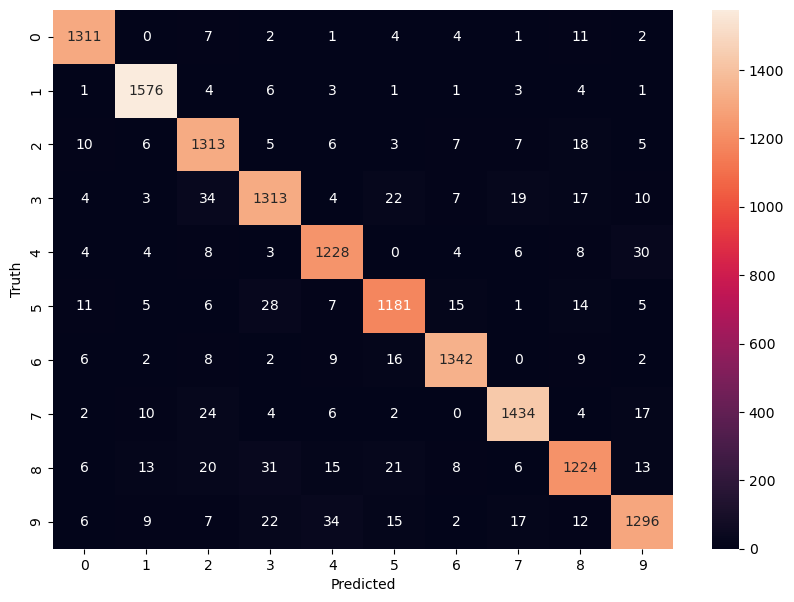

In [73]:
bagging_boostrap = BaggingClassifier(bootstrap = True, random_state = 42, n_jobs = -1)
bagging_boostrap.fit(x_train, y_train)
y_predicted_from_bagging_boostrap = bagging_boostrap.predict(x_test)
print(classification_report(y_test, y_predicted_from_bagging_boostrap))
show_confusion_matrix(y_test, y_predicted_from_bagging_boostrap)

## AdaBoost classifier

              precision    recall  f1-score   support

           0       0.75      0.84      0.79      1343
           1       0.82      0.96      0.88      1600
           2       0.68      0.38      0.49      1380
           3       0.78      0.59      0.67      1433
           4       0.71      0.65      0.68      1295
           5       0.77      0.60      0.67      1273
           6       0.48      0.93      0.64      1396
           7       0.76      0.75      0.76      1503
           8       0.73      0.60      0.66      1357
           9       0.63      0.59      0.61      1420

    accuracy                           0.69     14000
   macro avg       0.71      0.69      0.68     14000
weighted avg       0.71      0.69      0.69     14000



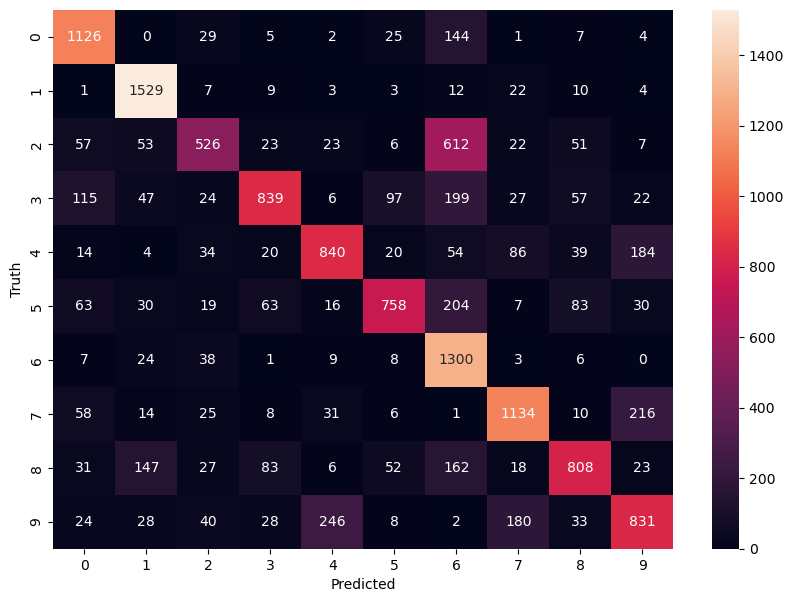

In [75]:
ada_boost = AdaBoostClassifier(n_estimators = 200, random_state = 42)
ada_boost.fit(x_train, y_train)
y_predicted_from_ada_boost = ada_boost.predict(x_test)
print(classification_report(y_test, y_predicted_from_ada_boost))
show_confusion_matrix(y_test, y_predicted_from_ada_boost)

## Gradient boosting classifier

##### This method takes too long to learn on dataset with >=10k samples, so a new smaller train set will be created

### Dataset split for gradient boosting

In [64]:
x_train_grad_boost, _, y_train_grad_boost, _ = train_test_split(x_scaled, y_int, test_size = 0.90, random_state = 42, shuffle = True)

print(f'x train: {x_train_grad_boost.shape}')
print(f'y train: {y_train_grad_boost.shape}')

x train: (7000, 784)
y train: (7000,)


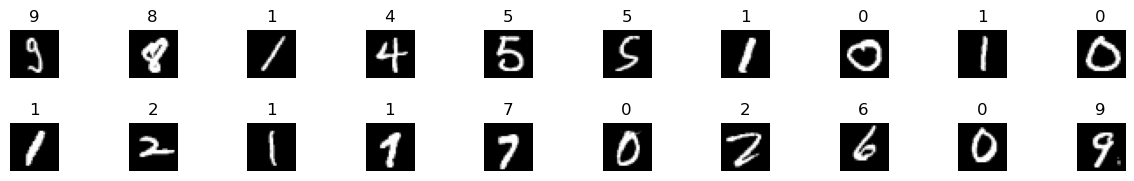

In [65]:
plt.subplots(2, 10, figsize = (12, 2))
plt.tight_layout()
for i in range(0, 20):
    plt.subplot(2, 10, i + 1)
    plt.axis('off')
    plt.gca().set_title(y_train_grad_boost.iloc[i])
    plt.imshow(x_train_grad_boost.iloc[[i]].to_numpy().reshape(28, 28), cmap = 'gray')
plt.show() 

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1343
           1       0.96      0.97      0.96      1600
           2       0.92      0.92      0.92      1380
           3       0.92      0.90      0.91      1433
           4       0.90      0.92      0.91      1295
           5       0.90      0.90      0.90      1273
           6       0.95      0.94      0.95      1396
           7       0.93      0.92      0.93      1503
           8       0.90      0.88      0.89      1357
           9       0.87      0.90      0.88      1420

    accuracy                           0.92     14000
   macro avg       0.92      0.92      0.92     14000
weighted avg       0.92      0.92      0.92     14000



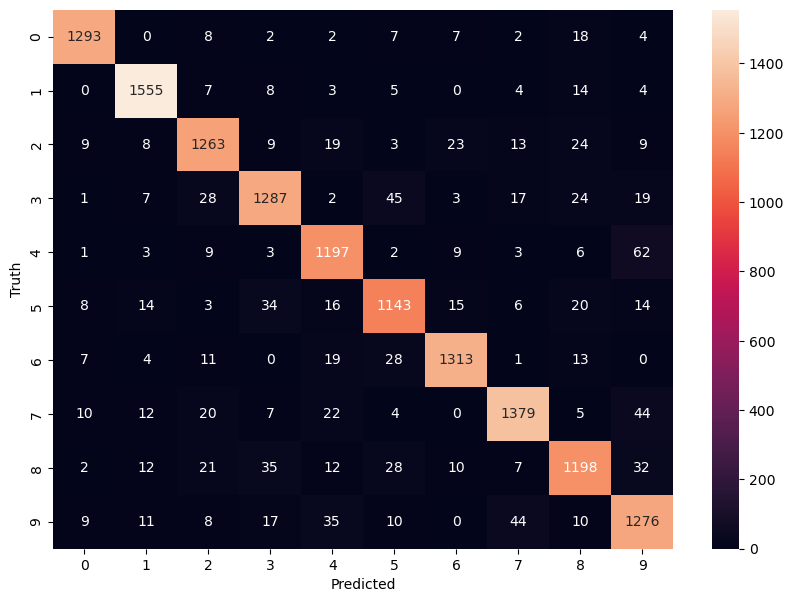

In [78]:
gradient_boosting = GradientBoostingClassifier(random_state = 42)
gradient_boosting.fit(x_train_grad_boost, y_train_grad_boost)
y_predicted_from_gradient_boosting = gradient_boosting.predict(x_test)
print(classification_report(y_test, y_predicted_from_gradient_boosting))
show_confusion_matrix(y_test, y_predicted_from_gradient_boosting)

## Histogram-based gradient boosting classifier

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1343
           1       0.99      0.98      0.99      1600
           2       0.96      0.98      0.97      1380
           3       0.98      0.97      0.97      1433
           4       0.97      0.98      0.97      1295
           5       0.98      0.98      0.98      1273
           6       0.99      0.98      0.99      1396
           7       0.97      0.97      0.97      1503
           8       0.97      0.97      0.97      1357
           9       0.96      0.96      0.96      1420

    accuracy                           0.98     14000
   macro avg       0.98      0.98      0.98     14000
weighted avg       0.98      0.98      0.98     14000



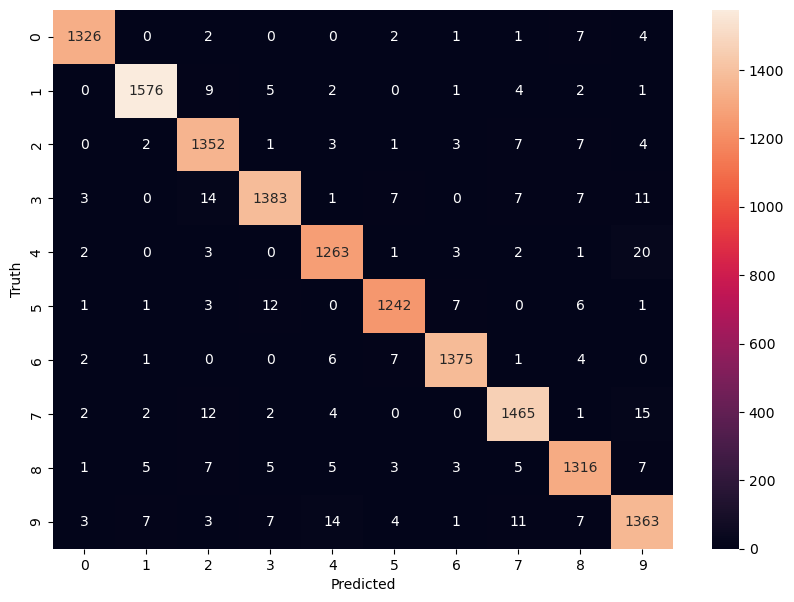

In [176]:
hist_gradient_boosting = HistGradientBoostingClassifier(random_state = 42)
hist_gradient_boosting.fit(x_train, y_train)
y_predicted_from_hist_gradient_boosting = hist_gradient_boosting.predict(x_test)
print(classification_report(y_test, y_predicted_from_hist_gradient_boosting))
show_confusion_matrix(y_test, y_predicted_from_hist_gradient_boosting)

## Voting classifier

### - Hard voting

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1343
           1       0.96      0.99      0.98      1600
           2       0.96      0.96      0.96      1380
           3       0.96      0.95      0.95      1433
           4       0.96      0.97      0.97      1295
           5       0.97      0.96      0.97      1273
           6       0.98      0.98      0.98      1396
           7       0.97      0.97      0.97      1503
           8       0.96      0.94      0.95      1357
           9       0.96      0.95      0.95      1420

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000



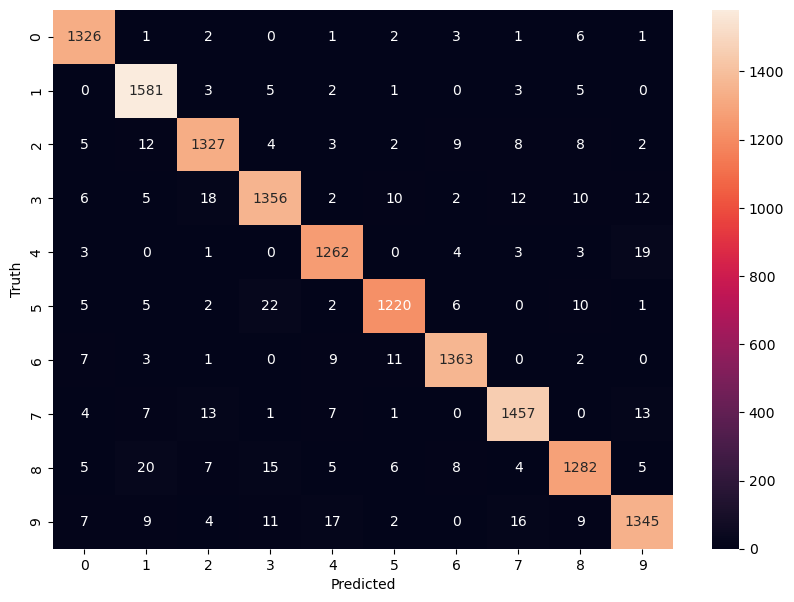

In [321]:
clf1 = LogisticRegression(random_state = 42)
clf2 = RandomForestClassifier(random_state = 42, n_jobs = -1)
clf3 = GaussianNB()
clf4 = SVC(random_state = 42)
voting_hard = VotingClassifier(
    n_jobs = -1,
    estimators = [('lr', clf1), ('rf', clf2), ('gnb', clf3), ('svc', clf4)],
    voting = 'hard')

voting_hard.fit(x_train, y_train)
y_predicted_from_voting_hard = voting_hard.predict(x_test)
print(classification_report(y_test, y_predicted_from_voting_hard))
show_confusion_matrix(y_test, y_predicted_from_voting_hard)

### - Soft voting

##### For some reason soft voting is fitting really slow in comparison with hard voting

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1343
           1       0.97      0.99      0.98      1600
           2       0.97      0.94      0.96      1380
           3       0.96      0.94      0.95      1433
           4       0.98      0.95      0.96      1295
           5       0.97      0.94      0.96      1273
           6       0.96      0.98      0.97      1396
           7       0.97      0.96      0.96      1503
           8       0.93      0.94      0.93      1357
           9       0.91      0.96      0.93      1420

    accuracy                           0.96     14000
   macro avg       0.96      0.96      0.96     14000
weighted avg       0.96      0.96      0.96     14000



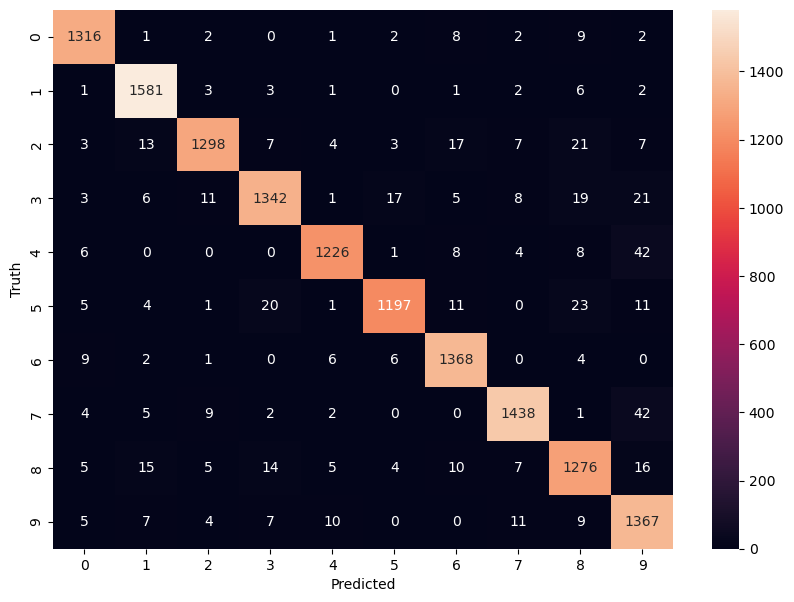

In [81]:
clf1 = LogisticRegression(random_state = 42)
clf2 = RandomForestClassifier(random_state = 42, n_jobs = -1)
clf3 = GaussianNB()
clf4 = SVC(random_state = 42, probability = True)
voting_soft = VotingClassifier(
    n_jobs = -1,
    estimators = [('lr', clf1), ('rf', clf2), ('gnb', clf3), ('svc', clf4)],
    voting = 'soft')

voting_soft.fit(x_train, y_train)
y_predicted_from_voting_soft = voting_soft.predict(x_test)
print(classification_report(y_test, y_predicted_from_voting_soft))
show_confusion_matrix(y_test, y_predicted_from_voting_soft)

## CatBoost classifier

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Resulting tree count: 93
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1343
           1       0.97      0.98      0.98      1600
           2       0.95      0.95      0.95      1380
           3       0.95      0.93      0.94      1433
           4       0.96      0.95      0.96      1295
           5       0.95      0.95      0.95      1273
           6       0.97      0.98      0.97      1396
           7       0.95      0.95      0.95      1503
           8       0.94      0.93      0.94      1357
           9       0.93      0.94      0.94      1420

    accuracy                           0.96     14000
   macro avg       0.96      0.96      0.96     14000
weighted avg       0.96      0.96      0.96     14000



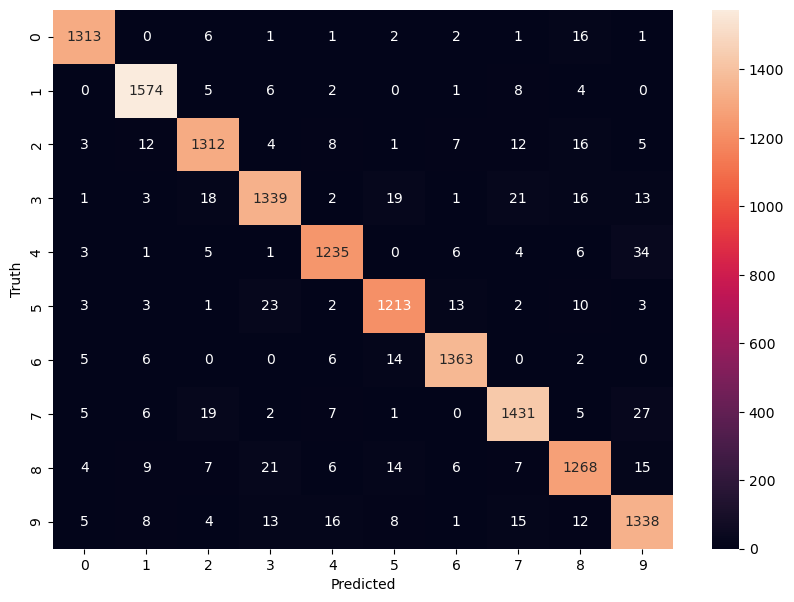

In [82]:
cat_classifier = CatBoostClassifier(
    loss_function = 'MultiClass',
    eval_metric = 'Accuracy',
    random_seed = 42,
    od_type = 'Iter',
    od_wait = 20,
    task_type = 'GPU')

cat_classifier.fit(x_train, y_train, eval_set = (x_validation, y_validation), logging_level = 'Silent', plot = True)
print(f'Resulting tree count: {cat_classifier.tree_count_}')
y_predicted_from_cat = cat_classifier.predict(x_test)
print(classification_report(y_test, y_predicted_from_cat))
show_confusion_matrix(y_test, y_predicted_from_cat)

## CatBoost grid search classifier

In [13]:
cat_parameters = {
    'depth': [2, 8],
    'learning_rate': [1, 1e-1],
    'iterations': [20, 40],
    'l2_leaf_reg': [3, 10]
}

cat_classifier = CatBoostClassifier(
    loss_function = 'MultiClass',
    eval_metric = 'Accuracy',
    random_seed = 42,
    od_type = 'Iter',
    od_wait = 20,
    task_type = 'GPU')

cat_grid_search_result = cat_classifier.grid_search(cat_parameters, cv = 3, X = x_train, y = y_train, plot = True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.3266447	test: 0.3325188	best: 0.3325188 (0)	total: 34.6ms	remaining: 657ms
1:	learn: 0.3593750	test: 0.3623120	best: 0.3623120 (1)	total: 64.8ms	remaining: 583ms
2:	learn: 0.4997650	test: 0.5026316	best: 0.5026316 (2)	total: 93.9ms	remaining: 532ms
3:	learn: 0.5716635	test: 0.5703008	best: 0.5703008 (3)	total: 122ms	remaining: 487ms
4:	learn: 0.6298167	test: 0.6308271	best: 0.6308271 (4)	total: 149ms	remaining: 447ms
5:	learn: 0.6588816	test: 0.6537594	best: 0.6537594 (5)	total: 174ms	remaining: 407ms
6:	learn: 0.6943844	test: 0.6935150	best: 0.6935150 (6)	total: 202ms	remaining: 376ms
7:	learn: 0.7312735	test: 0.7293233	best: 0.7293233 (7)	total: 230ms	remaining: 345ms
8:	learn: 0.7439145	test: 0.7418233	best: 0.7418233 (8)	total: 254ms	remaining: 311ms
9:	learn: 0.7629934	test: 0.7629699	best: 0.7629699 (9)	total: 283ms	remaining: 283ms
10:	learn: 0.7746241	test: 0.7742481	best: 0.7742481 (10)	total: 306ms	remaining: 250ms
11:	learn: 0.7876880	test: 0.7831767	best: 0.7831

9:	learn: 0.7629934	test: 0.7629699	best: 0.7629699 (9)	total: 262ms	remaining: 785ms
10:	learn: 0.7746241	test: 0.7742481	best: 0.7742481 (10)	total: 287ms	remaining: 758ms
11:	learn: 0.7876880	test: 0.7831767	best: 0.7831767 (11)	total: 315ms	remaining: 734ms
12:	learn: 0.7980968	test: 0.7958647	best: 0.7958647 (12)	total: 337ms	remaining: 700ms
13:	learn: 0.8008694	test: 0.7990602	best: 0.7990602 (13)	total: 359ms	remaining: 667ms
14:	learn: 0.8075423	test: 0.8043233	best: 0.8043233 (14)	total: 382ms	remaining: 636ms
15:	learn: 0.8117481	test: 0.8077068	best: 0.8077068 (15)	total: 405ms	remaining: 608ms
16:	learn: 0.8228853	test: 0.8202068	best: 0.8202068 (16)	total: 433ms	remaining: 586ms
17:	learn: 0.8272321	test: 0.8216165	best: 0.8216165 (17)	total: 456ms	remaining: 557ms
18:	learn: 0.8332942	test: 0.8294173	best: 0.8294173 (18)	total: 481ms	remaining: 531ms
19:	learn: 0.8381109	test: 0.8333647	best: 0.8333647 (19)	total: 505ms	remaining: 505ms
20:	learn: 0.8418233	test: 0.83731

27:	learn: 0.8663064	test: 0.8609962	best: 0.8609962 (27)	total: 699ms	remaining: 299ms
28:	learn: 0.8690789	test: 0.8633459	best: 0.8633459 (28)	total: 723ms	remaining: 274ms
29:	learn: 0.8699483	test: 0.8640038	best: 0.8640038 (29)	total: 745ms	remaining: 248ms
30:	learn: 0.8713346	test: 0.8646617	best: 0.8646617 (30)	total: 768ms	remaining: 223ms
31:	learn: 0.8713816	test: 0.8647556	best: 0.8647556 (31)	total: 790ms	remaining: 197ms
32:	learn: 0.8718045	test: 0.8656955	best: 0.8656955 (32)	total: 812ms	remaining: 172ms
33:	learn: 0.8744831	test: 0.8697368	best: 0.8697368 (33)	total: 838ms	remaining: 148ms
34:	learn: 0.8754934	test: 0.8692669	best: 0.8697368 (33)	total: 860ms	remaining: 123ms
35:	learn: 0.8809211	test: 0.8723684	best: 0.8723684 (35)	total: 886ms	remaining: 98.5ms
36:	learn: 0.8833177	test: 0.8746241	best: 0.8746241 (36)	total: 909ms	remaining: 73.7ms
37:	learn: 0.8845160	test: 0.8753759	best: 0.8753759 (37)	total: 930ms	remaining: 49ms
38:	learn: 0.8851739	test: 0.87

18:	learn: 0.9156485	test: 0.9049812	best: 0.9049812 (18)	total: 6.41s	remaining: 338ms
19:	learn: 0.9188910	test: 0.9082707	best: 0.9082707 (19)	total: 6.75s	remaining: 0us
bestTest = 0.9082706767
bestIteration = 19
9:	loss: 0.9082707	best: 0.9217105 (8)	total: 26.2s	remaining: 15.7s
0:	learn: 0.6801927	test: 0.6743421	best: 0.6743421 (0)	total: 367ms	remaining: 6.98s
1:	learn: 0.7730733	test: 0.7651316	best: 0.7651316 (1)	total: 712ms	remaining: 6.4s
2:	learn: 0.8204887	test: 0.8068609	best: 0.8068609 (2)	total: 1.05s	remaining: 5.98s
3:	learn: 0.8375000	test: 0.8220865	best: 0.8220865 (3)	total: 1.35s	remaining: 5.41s
4:	learn: 0.8608318	test: 0.8454887	best: 0.8454887 (4)	total: 1.69s	remaining: 5.06s
5:	learn: 0.8740367	test: 0.8561090	best: 0.8561090 (5)	total: 2s	remaining: 4.67s
6:	learn: 0.8868421	test: 0.8703008	best: 0.8703008 (6)	total: 2.31s	remaining: 4.29s
7:	learn: 0.8988017	test: 0.8796992	best: 0.8796992 (7)	total: 2.6s	remaining: 3.9s
8:	learn: 0.9080827	test: 0.8881

8:	learn: 0.8716400	test: 0.8654135	best: 0.8654135 (8)	total: 3.06s	remaining: 10.5s
9:	learn: 0.8799812	test: 0.8709586	best: 0.8709586 (9)	total: 3.4s	remaining: 10.2s
10:	learn: 0.8842810	test: 0.8767857	best: 0.8767857 (10)	total: 3.73s	remaining: 9.84s
11:	learn: 0.8917293	test: 0.8840226	best: 0.8840226 (11)	total: 4.08s	remaining: 9.53s
12:	learn: 0.8963581	test: 0.8875940	best: 0.8875940 (12)	total: 4.43s	remaining: 9.2s
13:	learn: 0.9000940	test: 0.8915414	best: 0.8915414 (13)	total: 4.78s	remaining: 8.87s
14:	learn: 0.9037359	test: 0.8944549	best: 0.8944549 (14)	total: 5.12s	remaining: 8.53s
15:	learn: 0.9067669	test: 0.8975564	best: 0.8975564 (15)	total: 5.47s	remaining: 8.2s
16:	learn: 0.9096805	test: 0.8998120	best: 0.8998120 (16)	total: 5.81s	remaining: 7.87s
17:	learn: 0.9132754	test: 0.9024436	best: 0.9024436 (17)	total: 6.14s	remaining: 7.51s
18:	learn: 0.9156485	test: 0.9049812	best: 0.9049812 (18)	total: 6.47s	remaining: 7.15s
19:	learn: 0.9188910	test: 0.9082707	be

20:	learn: 0.9062500	test: 0.8996241	best: 0.8996241 (20)	total: 7.09s	remaining: 6.42s
21:	learn: 0.9095395	test: 0.9019737	best: 0.9019737 (21)	total: 7.42s	remaining: 6.08s
22:	learn: 0.9113957	test: 0.9047932	best: 0.9047932 (22)	total: 7.76s	remaining: 5.73s
23:	learn: 0.9131344	test: 0.9060150	best: 0.9060150 (23)	total: 8.09s	remaining: 5.39s
24:	learn: 0.9151551	test: 0.9075188	best: 0.9075188 (24)	total: 8.39s	remaining: 5.03s
25:	learn: 0.9165414	test: 0.9083647	best: 0.9083647 (25)	total: 8.69s	remaining: 4.68s
26:	learn: 0.9188675	test: 0.9103383	best: 0.9103383 (26)	total: 9.01s	remaining: 4.34s
27:	learn: 0.9199248	test: 0.9113722	best: 0.9113722 (27)	total: 9.33s	remaining: 4s
28:	learn: 0.9216165	test: 0.9140038	best: 0.9140038 (28)	total: 9.65s	remaining: 3.66s
29:	learn: 0.9231203	test: 0.9152256	best: 0.9152256 (29)	total: 9.97s	remaining: 3.32s
30:	learn: 0.9250705	test: 0.9162594	best: 0.9162594 (30)	total: 10.3s	remaining: 2.99s
31:	learn: 0.9266447	test: 0.917387

32:	learn: 0.9401415	test: 0.9281002	best: 0.9281002 (32)	total: 11.3s	remaining: 2.4s
33:	learn: 0.9413257	test: 0.9294536	best: 0.9294536 (33)	total: 11.7s	remaining: 2.06s
34:	learn: 0.9429047	test: 0.9306378	best: 0.9306378 (34)	total: 12s	remaining: 1.72s
35:	learn: 0.9434686	test: 0.9309761	best: 0.9309761 (35)	total: 12.4s	remaining: 1.38s
36:	learn: 0.9451321	test: 0.9318784	best: 0.9318784 (36)	total: 12.8s	remaining: 1.03s
37:	learn: 0.9467110	test: 0.9331754	best: 0.9331754 (37)	total: 13.1s	remaining: 692ms
38:	learn: 0.9474441	test: 0.9343033	best: 0.9343033 (38)	total: 13.5s	remaining: 345ms
39:	learn: 0.9484591	test: 0.9354875	best: 0.9354875 (39)	total: 13.8s	remaining: 0us
bestTest = 0.9354875092
bestIteration = 39
Training on fold [2/3]
0:	learn: 0.6810826	test: 0.6742245	best: 0.6742245 (0)	total: 341ms	remaining: 13.3s
1:	learn: 0.7507189	test: 0.7450649	best: 0.7450649 (1)	total: 672ms	remaining: 12.8s
2:	learn: 0.7868339	test: 0.7785674	best: 0.7785674 (2)	total: 

In [18]:
print(f"Best parameters: {cat_grid_search_result['params']}")

Best parameters: {'depth': 8, 'l2_leaf_reg': 3, 'iterations': 40, 'learning_rate': 0.1}


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Resulting tree count: 39
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1343
           1       0.95      0.98      0.97      1600
           2       0.93      0.93      0.93      1380
           3       0.93      0.91      0.92      1433
           4       0.95      0.93      0.94      1295
           5       0.94      0.93      0.94      1273
           6       0.96      0.96      0.96      1396
           7       0.95      0.94      0.94      1503
           8       0.92      0.90      0.91      1357
           9       0.89      0.92      0.91      1420

    accuracy                           0.94     14000
   macro avg       0.94      0.94      0.94     14000
weighted avg       0.94      0.94      0.94     14000



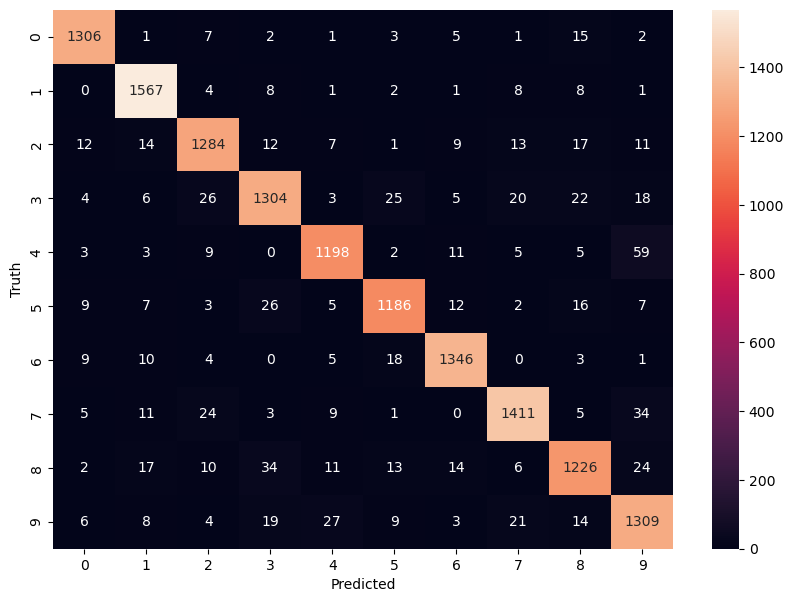

In [19]:
cat_classifier_from_grid = CatBoostClassifier(
    loss_function = 'MultiClass',
    eval_metric = 'Accuracy',
    random_seed = 42,
    od_type = 'Iter',
    od_wait = 20,
    task_type = 'GPU',
    depth = cat_grid_search_result['params']['depth'],
    learning_rate = cat_grid_search_result['params']['learning_rate'],
    l2_leaf_reg = cat_grid_search_result['params']['l2_leaf_reg'],
    iterations = cat_grid_search_result['params']['iterations'])

cat_classifier_from_grid.fit(
    x_train,
    y_train,
    eval_set = (x_validation, y_validation),
    logging_level = 'Silent',
    plot = True)

print(f'Resulting tree count: {cat_classifier_from_grid.tree_count_}')
y_predicted_from_cat_grid = cat_classifier_from_grid.predict(x_test)
print(classification_report(y_test, y_predicted_from_cat_grid))
show_confusion_matrix(y_test, y_predicted_from_cat_grid)

## XGBoost classifier

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1343
           1       0.99      0.99      0.99      1600
           2       0.97      0.98      0.97      1380
           3       0.98      0.96      0.97      1433
           4       0.98      0.98      0.98      1295
           5       0.98      0.98      0.98      1273
           6       0.99      0.99      0.99      1396
           7       0.98      0.97      0.98      1503
           8       0.97      0.97      0.97      1357
           9       0.96      0.96      0.96      1420

    accuracy                           0.98     14000
   macro avg       0.98      0.98      0.98     14000
weighted avg       0.98      0.98      0.98     14000



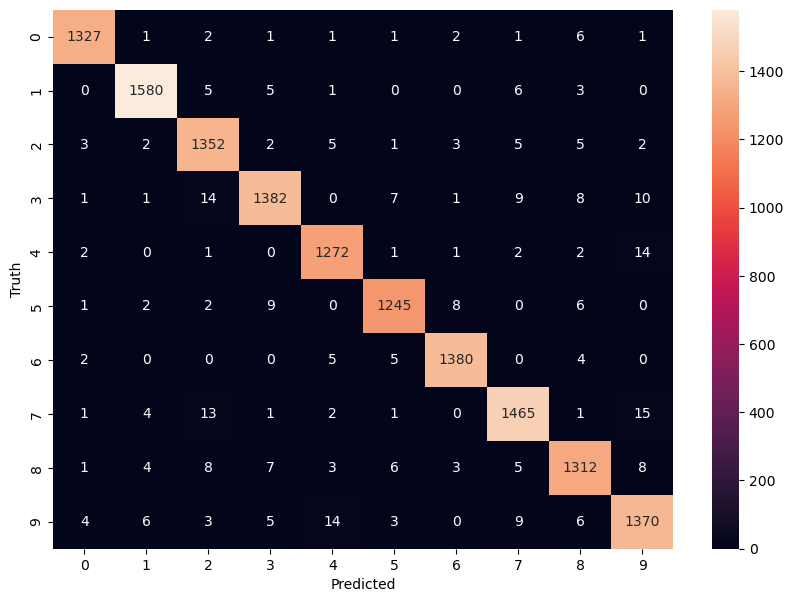

In [188]:
xgb_classifier = XGBClassifier(tree_method='gpu_hist', verbosity = 0)
xgb_classifier.fit(x_train, y_train)
y_predicted_from_xgb = xgb_classifier.predict(x_test)
print(classification_report(y_test, y_predicted_from_xgb))
show_confusion_matrix(y_test, y_predicted_from_xgb)

## Perceptron

In [10]:
perceptron = Sequential([
    Input(shape = x_train.shape[1]),
    Dense(50, activation = 'relu'),
    Dense(50, activation = 'relu'),
    Dropout(0.5),
    Dense(20, activation = 'relu'),
    Dense(y_train_categorical.shape[1], activation = 'softmax')
])

perceptron.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
print(perceptron.summary())

epochs = 100
early_stopping_monitor_perceptron = EarlyStopping(
    monitor = 'val_loss',
    min_delta = 1e-4, 
    patience = 3,
    verbose = 1,
    mode = 'auto',
    restore_best_weights = False)

model_checkpoint_perceptron = ModelCheckpoint(
    filepath = 'mnist_digits_perceptron_{epoch}.keras',
    monitor = 'val_loss',
    verbose = 1)

perceptron_history = perceptron.fit(
    x_train, 
    y_train_categorical, 
    validation_data = (x_validation, y_validation_categorical),
    batch_size = 64,
    callbacks = [early_stopping_monitor_perceptron, model_checkpoint_perceptron],
    epochs = epochs)

loss, accuracy = perceptron.evaluate(x_test, y_test_categorical)  

print('---------')
print(f'Accuracy: {accuracy}, loss: {loss}')
print('---------')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                39250     
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 20)                1020      
                                                                 
 dense_3 (Dense)             (None, 10)                210       
                                                                 
Total params: 43,030
Trainable params: 43,030
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
829/832 [==========================

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1343
           1       0.98      0.98      0.98      1600
           2       0.95      0.97      0.96      1380
           3       0.97      0.94      0.96      1433
           4       0.95      0.97      0.96      1295
           5       0.97      0.96      0.97      1273
           6       0.97      0.98      0.97      1396
           7       0.95      0.98      0.97      1503
           8       0.95      0.95      0.95      1357
           9       0.98      0.92      0.95      1420

    accuracy                           0.96     14000
   macro avg       0.96      0.96      0.96     14000
weighted avg       0.96      0.96      0.96     14000



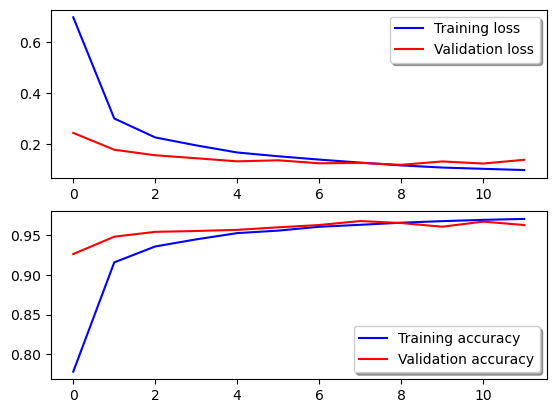

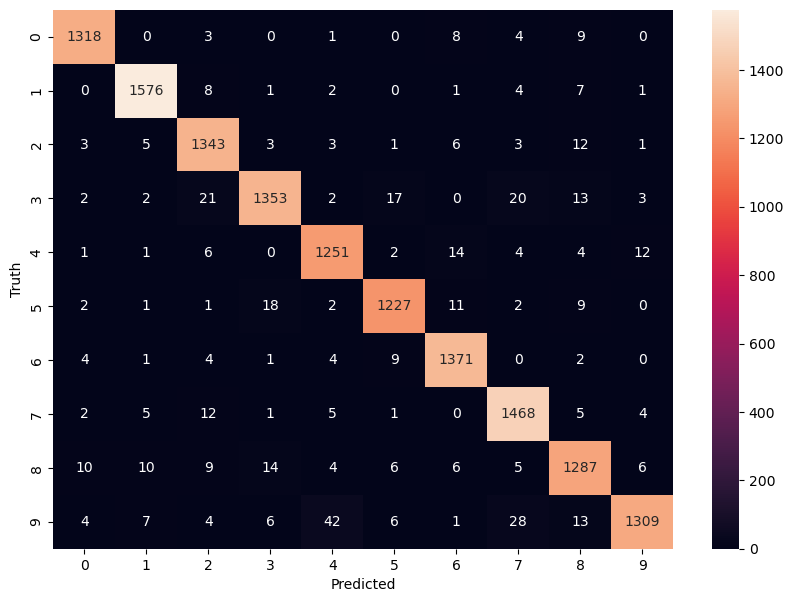

In [14]:
show_training_history(perceptron_history)
y_predicted_from_perceptron = np.argmax(perceptron.predict(x_test), axis = 1)
print(classification_report(y_test, y_predicted_from_perceptron))
show_confusion_matrix(y_test, y_predicted_from_perceptron)

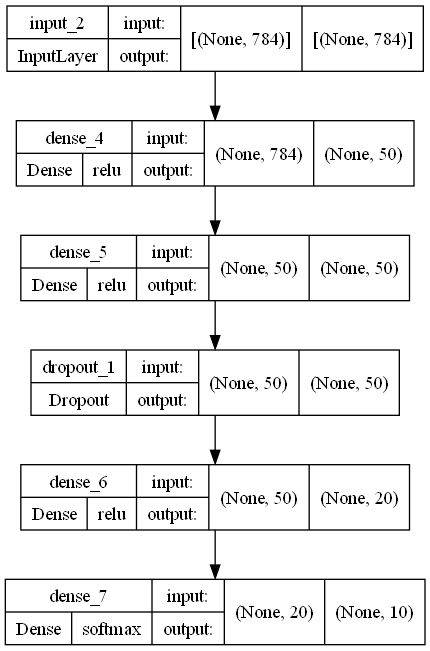

In [21]:
keras.utils.plot_model(
    perceptron,
    to_file = 'mnist_digits_perceptron.png',
    rankdir = 'TB',
    show_shapes = True,
    show_layer_activations = True)

## Convolutional neural network (CNN)

### Dataset split for train & test of CNN

In [8]:
x_train_cnn_, x_test_cnn, y_train_cnn_, y_test_cnn = train_test_split(x_scaled, y_int, test_size = 0.20, random_state = 42, shuffle = True)
x_train_cnn, x_validation_cnn, y_train_cnn, y_validation_cnn = train_test_split(x_train_cnn_, y_train_cnn_, test_size = 0.05, random_state = 42)

x_train_cnn = np.reshape(x_train_cnn, (x_train_cnn.shape[0], 28, 28, 1))
x_test_cnn = np.reshape(x_test_cnn, (x_test_cnn.shape[0], 28, 28, 1))
x_validation_cnn = np.reshape(x_validation_cnn, (x_validation_cnn.shape[0], 28, 28, 1))

y_train_cnn_categorical = to_categorical(y_train_cnn)
y_test_cnn_categorical = to_categorical(y_test_cnn)
y_validation_cnn_categorical = to_categorical(y_validation_cnn)

print(f'x train: {x_train_cnn.shape}')
print(f'y train: {y_train_cnn_categorical.shape}')
print()
print(f'x test: {x_test_cnn.shape}')
print(f'y test: {y_test_cnn_categorical.shape}')
print()
print(f'x validation: {x_validation_cnn.shape}')
print(f'y validation: {y_validation_cnn_categorical.shape}')

x train: (53200, 28, 28, 1)
y train: (53200, 10)

x test: (14000, 28, 28, 1)
y test: (14000, 10)

x validation: (2800, 28, 28, 1)
y validation: (2800, 10)


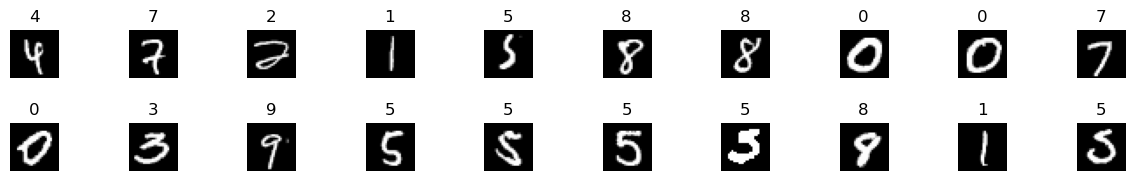

In [12]:
plt.subplots(2, 10, figsize = (12, 2))
plt.tight_layout()
for i in range(0, 20):
    plt.subplot(2, 10, i + 1)
    plt.axis('off')
    plt.gca().set_title(y_train_cnn.iloc[i])
    plt.imshow(x_train_cnn[i], cmap = 'gray')
plt.show() 

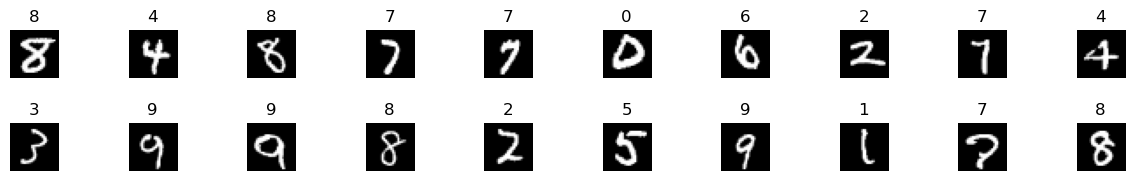

In [13]:
plt.subplots(2, 10, figsize = (12, 2))
plt.tight_layout()
for i in range(0, 20):
    plt.subplot(2, 10, i + 1)
    plt.axis('off')
    plt.gca().set_title(y_test_cnn.iloc[i])
    plt.imshow(x_test_cnn[i], cmap = 'gray')
plt.show() 

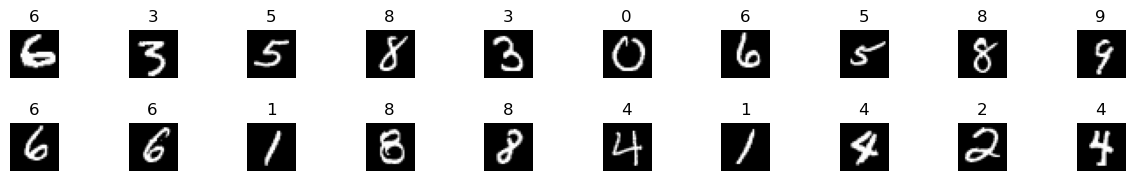

In [14]:
plt.subplots(2, 10, figsize = (12, 2))
plt.tight_layout()
for i in range(0, 20):
    plt.subplot(2, 10, i + 1)
    plt.axis('off')
    plt.gca().set_title(y_validation_cnn.iloc[i])
    plt.imshow(x_validation_cnn[i], cmap = 'gray')
plt.show() 

### CNN classifier

In [16]:
cnn = Sequential([
    Conv2D(32, kernel_size = (3, 3), activation = "relu", input_shape = (28, 28, 1)),
    MaxPooling2D(pool_size = (2, 2)),
    Conv2D(64, kernel_size = (3, 3), activation = "relu"),
    MaxPooling2D(pool_size = (2, 2)),
    Flatten(),
    Dropout(0.5),
    Dense(y_train_cnn_categorical.shape[1], activation = "softmax")
])

cnn.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
print(cnn.summary())

epochs = 100
early_stopping_monitor_cnn = EarlyStopping(
    monitor = 'val_loss',
    min_delta = 1e-4, 
    patience = 3,
    verbose = 1,
    mode = 'auto',
    restore_best_weights = False)

model_checkpoint_cnn = ModelCheckpoint(
    filepath = 'mnist_digits_cnn_{epoch}.keras',
    monitor = 'val_loss',
    verbose = 1)

cnn_history = cnn.fit(
    x_train_cnn, 
    y_train_cnn_categorical, 
    validation_data = (x_validation_cnn, y_validation_cnn_categorical),
    batch_size = 64,
    callbacks = [early_stopping_monitor_cnn, model_checkpoint_cnn],
    epochs = epochs)

loss, accuracy = cnn.evaluate(x_test_cnn, y_test_cnn_categorical)  

print('---------')
print(f'Accuracy: {accuracy}, loss: {loss}')
print('---------')

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout_1 (Dropout)         (None, 1600)             

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1343
           1       1.00      0.99      1.00      1600
           2       0.98      0.99      0.99      1380
           3       0.99      0.99      0.99      1433
           4       0.99      0.99      0.99      1295
           5       0.99      0.99      0.99      1273
           6       1.00      0.99      0.99      1396
           7       0.99      0.99      0.99      1503
           8       0.99      0.98      0.98      1357
           9       0.99      0.98      0.99      1420

    accuracy                           0.99     14000
   macro avg       0.99      0.99      0.99     14000
weighted avg       0.99      0.99      0.99     14000



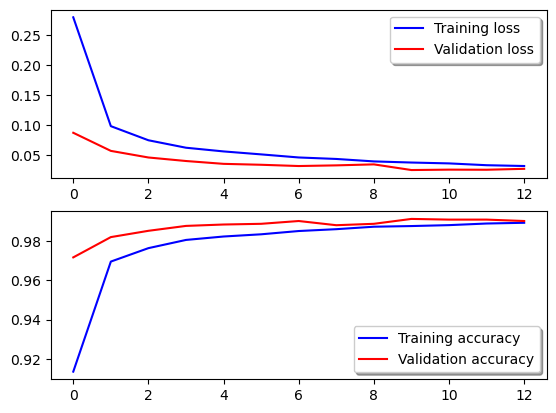

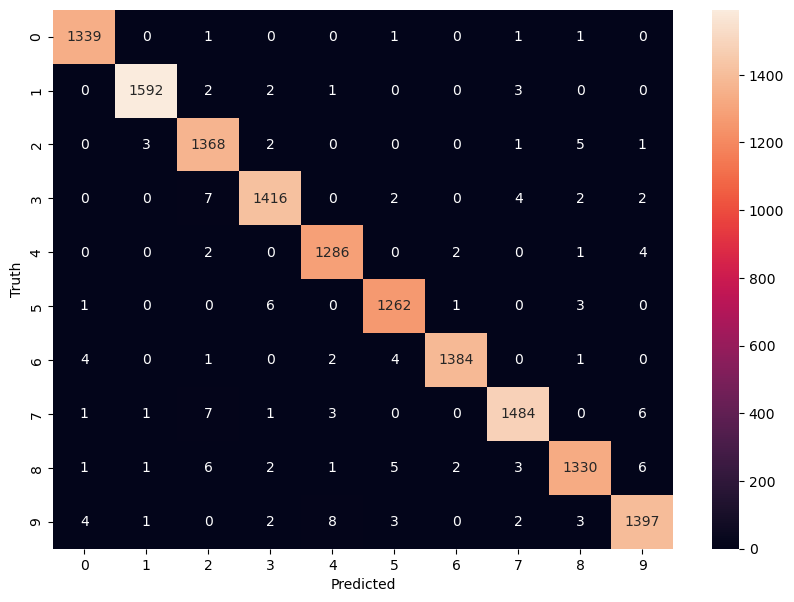

In [17]:
show_training_history(cnn_history)
y_predicted_from_cnn = np.argmax(cnn.predict(x_test_cnn), axis = 1)
print(classification_report(y_test_cnn, y_predicted_from_cnn))
show_confusion_matrix(y_test_cnn, y_predicted_from_cnn)

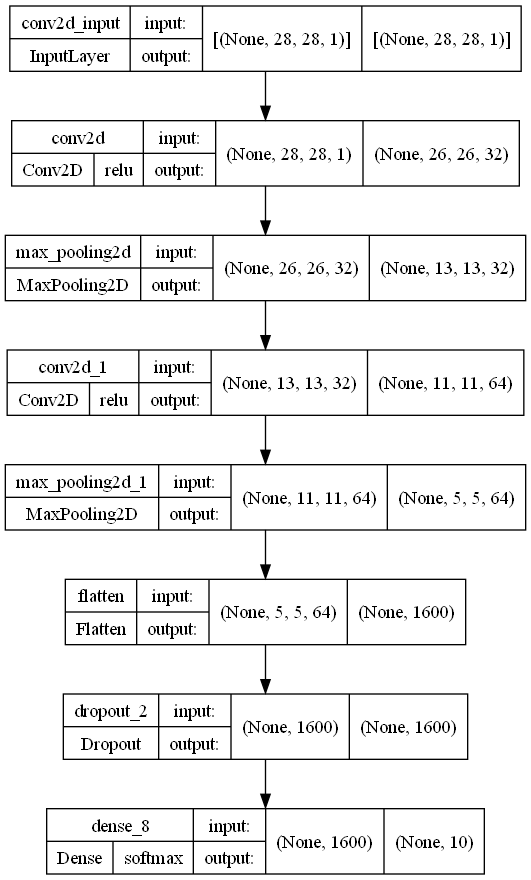

In [24]:
keras.utils.plot_model(
    cnn,
    to_file = 'mnist_digits_cnn.png',
    rankdir = 'TB',
    show_shapes = True,
    show_layer_activations = True)

### Augmentation showcase

#### Preprocessing layers as part of the model

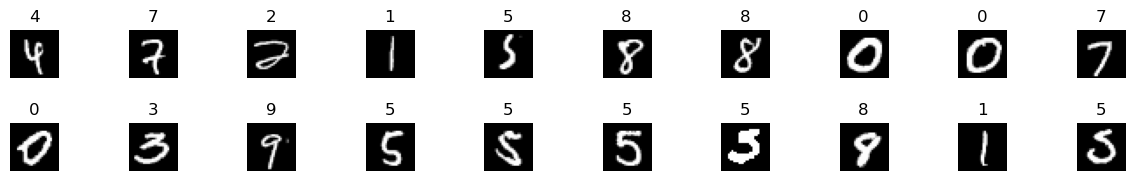

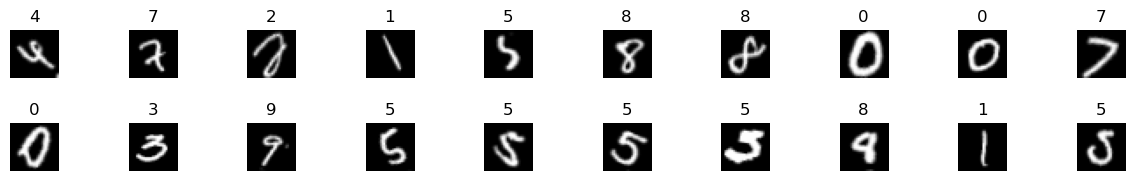

In [18]:
digits_augmentation = Sequential([
    RandomRotation(0.1),
    RandomZoom(0.2, 0.2)
])

plt.subplots(2, 10, figsize = (12, 2))
plt.tight_layout()
for i in range(0, 20):
    plt.subplot(2, 10, i + 1)
    plt.axis('off')
    plt.gca().set_title(y_train_cnn.iloc[i])
    plt.imshow(x_train_cnn[i], cmap = 'gray')

plt.subplots(2, 10, figsize = (12, 2))
plt.tight_layout()
for i in range(0, 20):
    plt.subplot(2, 10, i + 1)
    plt.axis('off')
    plt.gca().set_title(y_train_cnn.iloc[i])
    plt.imshow(digits_augmentation(x_train_cnn[i], training = True), cmap = 'gray')
plt.show() 

##### For some reason using preprocessing layers as part of the model makes training process really-really slow
##### But in TensorFlow 2.8.3 everything works fine

#### Applying ImageDataGenerator to the dataset

Train set:


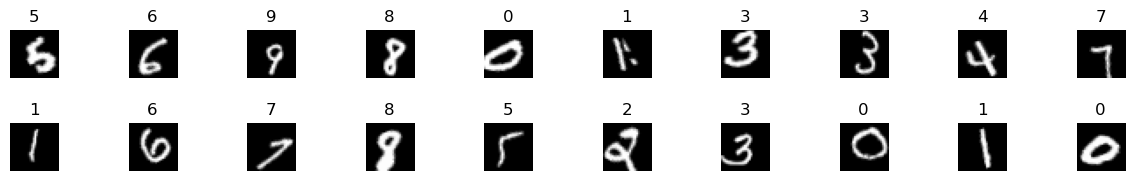

In [9]:
augmentation_generator_train = ImageDataGenerator(
    rotation_range = 30,
    zoom_range = 0.2,
    width_shift_range = 0.1,
    height_shift_range = 0.1)

augmentation_generator_train.fit(x_train_cnn, seed = 42)

print("Train set:")
plt.subplots(2, 10, figsize = (12, 2))
plt.tight_layout()
for i in range(0, 20):
    plt.subplot(2, 10, i + 1)
    plt.axis('off')     
    image = augmentation_generator_train.flow(x_train_cnn, y_train_cnn_categorical, batch_size = 1).next()
    plt.gca().set_title(np.argmax(image[1][0]))
    plt.imshow(image[0].reshape(28, 28), cmap = 'gray')    

Validation set:


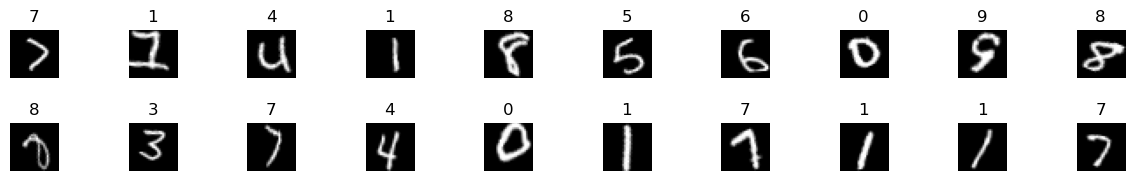

In [10]:
augmentation_generator_validation = ImageDataGenerator(
    rotation_range = 30,
    zoom_range = 0.2,
    width_shift_range = 0.1,
    height_shift_range = 0.1)

augmentation_generator_validation.fit(x_validation_cnn, seed = 42)

print("Validation set:")
plt.subplots(2, 10, figsize = (12, 2))
plt.tight_layout()
for i in range(0, 20):
    plt.subplot(2, 10, i + 1)
    plt.axis('off')
    image = augmentation_generator_validation.flow(x_validation_cnn, y_validation_cnn_categorical, batch_size = 1).next()
    plt.gca().set_title(np.argmax(image[1][0]))
    plt.imshow(image[0].reshape(28, 28), cmap = 'gray')
plt.show()

### CNN classifier with augmentation

##### Both approaches (ImageDataGenerator and preprocessing layers) work fine in TensorFlow version 2.8.3

In [11]:
cnn_aug = Sequential([
    #digits_augmentation,
    #RandomRotation(0.1),
    #RandomZoom(0.2, 0.2),
    Conv2D(32, kernel_size = (3, 3), activation = "relu", input_shape = (28, 28, 1)),
    MaxPooling2D(pool_size = (2, 2)),
    Conv2D(64, kernel_size = (3, 3), activation = "relu"),
    MaxPooling2D(pool_size = (2, 2)),
    Flatten(),
    Dropout(0.5),
    Dense(y_train_cnn_categorical.shape[1], activation = "softmax")
])

cnn_aug.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
#input_shape = x_train_cnn.shape
#cnn_aug.build(input_shape = input_shape)
print(cnn_aug.summary())

epochs = 100
early_stopping_monitor_cnn_aug = EarlyStopping(
    monitor = 'val_loss',
    min_delta = 1e-4, 
    patience = 3,
    verbose = 1,
    mode = 'auto',
    restore_best_weights = False)

model_checkpoint_cnn_aug = ModelCheckpoint(
    filepath = 'mnist_digits_cnn_aug_{epoch}.keras',
    monitor = 'val_loss',
    verbose = 1)

batch_size = 64
cnn_aug_history = cnn_aug.fit(
    #x = x_train_cnn,
    x = augmentation_generator_train.flow(
        x_train_cnn,
        y_train_cnn_categorical,
        batch_size = batch_size),
    #y = y_train_cnn_categorical,
    #validation_data = (x_validation_cnn, y_validation_cnn_categorical),
    validation_data = augmentation_generator_validation.flow(
        x_validation_cnn,
        y_validation_cnn_categorical,
        batch_size = batch_size), 
    batch_size = batch_size,
    #callbacks = [early_stopping_monitor_cnn_aug, model_checkpoint_cnn_aug],
    callbacks = [early_stopping_monitor_cnn_aug],
    epochs = epochs)

loss, accuracy = cnn_aug.evaluate(x_test_cnn, y_test_cnn_categorical)  

print('---------')
print(f'Accuracy: {accuracy}, loss: {loss}')
print('---------')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1343
           1       1.00      0.99      0.99      1600
           2       0.98      0.98      0.98      1380
           3       1.00      0.98      0.99      1433
           4       0.98      0.99      0.99      1295
           5       0.99      0.98      0.99      1273
           6       0.99      0.99      0.99      1396
           7       0.98      0.99      0.99      1503
           8       0.99      0.99      0.99      1357
           9       0.99      0.98      0.98      1420

    accuracy                           0.99     14000
   macro avg       0.99      0.99      0.99     14000
weighted avg       0.99      0.99      0.99     14000



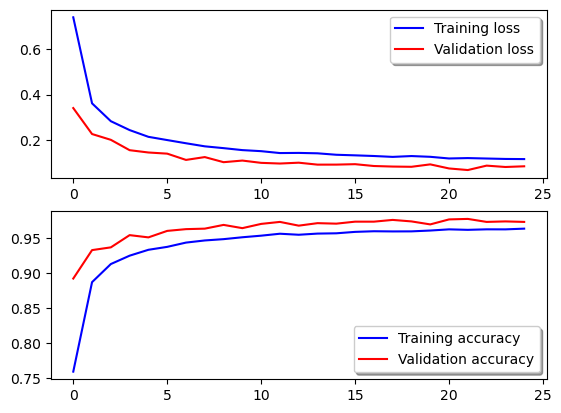

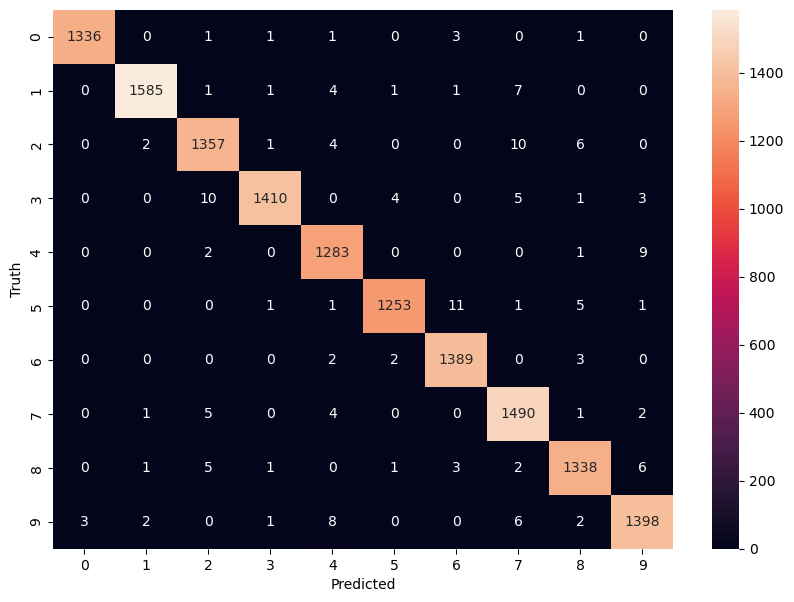

In [12]:
show_training_history(cnn_aug_history)
y_predicted_from_cnn_aug = np.argmax(cnn_aug.predict(x_test_cnn), axis = 1)
print(classification_report(y_test_cnn, y_predicted_from_cnn_aug))
show_confusion_matrix(y_test_cnn, y_predicted_from_cnn_aug)

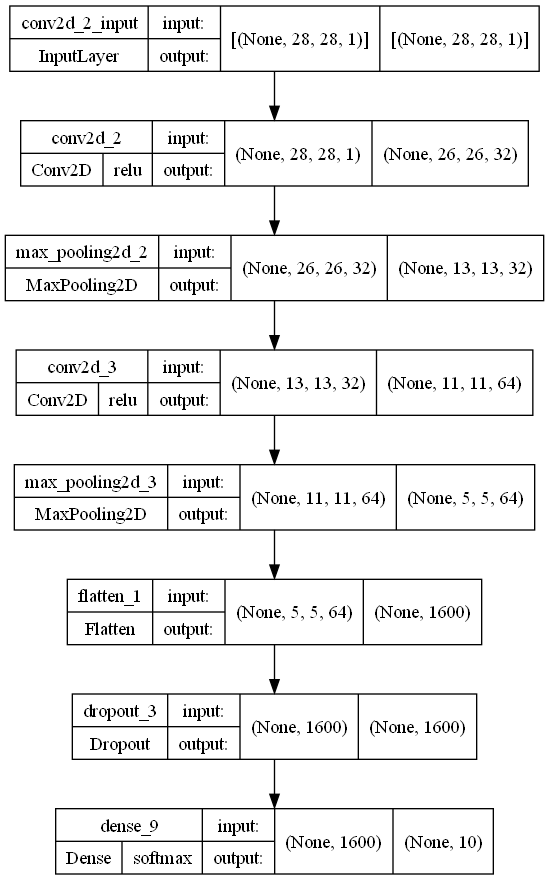

In [30]:
keras.utils.plot_model(
    cnn_aug,
    to_file = 'mnist_digits_cnn_aug.png',
    rankdir = 'TB',
    show_shapes = True,
    show_layer_activations = True)

# Visualization of predictions

## Arranging of a test subset

In [303]:
def make_test_subset(seed, augmented = False):
    random.seed(seed)
    test_images_list = []
    test_labels_list = []
    augmentation_generator = ImageDataGenerator(
        rotation_range = 30,
        zoom_range = 0.2,
        width_shift_range = 0.1,
        height_shift_range = 0.1)
    augmentation_generator.fit(x_test_cnn, seed = seed)
    for i in range (0, 40):
        random_number = random.randint(0, x_test.shape[0] - 1)
        image = x_test.iloc[random_number]
        label = y_test.iloc[random_number]
        if (augmented):
            augmented_image = augmentation_generator.flow(x_test_cnn, y_test_cnn, batch_size = 1).next()
            test_images_list.append(pd.Series(augmented_image[0].reshape(28 * 28)))
            test_labels_list.append(augmented_image[1][0])
        else:
            test_images_list.append(image)
            test_labels_list.append(label)
    test_images = pd.DataFrame(test_images_list)
    test_images_cnn = np.reshape(test_images, (test_images.shape[0], 28, 28, 1))
    test_labels = pd.Series(test_labels_list)
    return test_images, test_images_cnn, test_labels

def show_digits_classification_result(images, labels_test, labels_predicted):
    plt.subplots(4, 10, figsize = (12, 4))
    plt.tight_layout()
    for i in range(0, 40):
        plt.subplot(4, 10, i + 1)
        plt.axis('off')
        result_label = labels_predicted[i]
        real_label = labels_test.iloc[i]
        output_label = f'{result_label}✔️' if real_label == result_label else f'{result_label}✘ [{real_label}]'
        plt.gca().set_title(output_label)
        plt.imshow(images.iloc[[i]].to_numpy().reshape(28, 28), cmap = 'gray')
    plt.show()

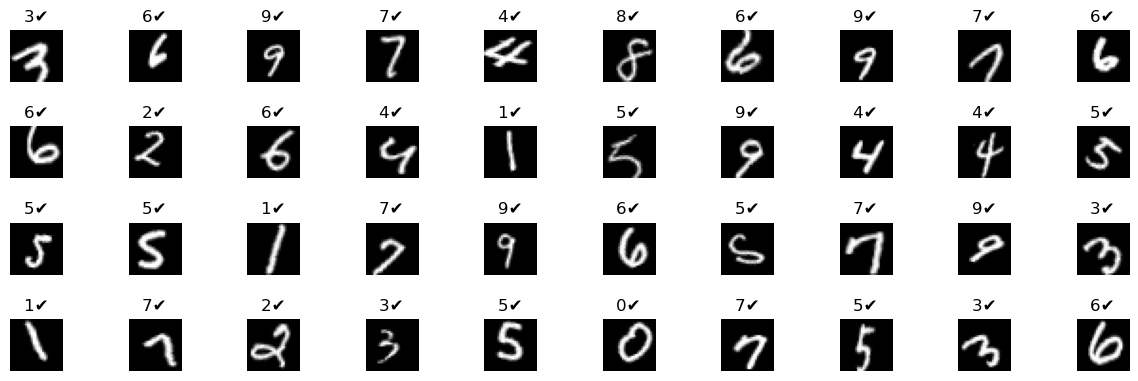

In [305]:
test_images, test_images_cnn, test_labels = make_test_subset(seed = 2508, augmented = True)
show_digits_classification_result(test_images, test_labels, test_labels)

## Test of various methods

### Logistic regression

C:\Users\dexp\miniconda3\envs\env-tf\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      0.33      0.40         3
           2       0.33      0.50      0.40         2
           3       0.00      0.00      0.00         4
           4       0.33      0.50      0.40         4
           5       0.67      0.29      0.40         7
           6       0.62      0.71      0.67         7
           7       0.50      0.17      0.25         6
           8       0.25      1.00      0.40         1
           9       0.00      0.00      0.00         5

    accuracy                           0.33        40
   macro avg       0.32      0.35      0.29        40
weighted avg       0.39      0.33      0.32        40



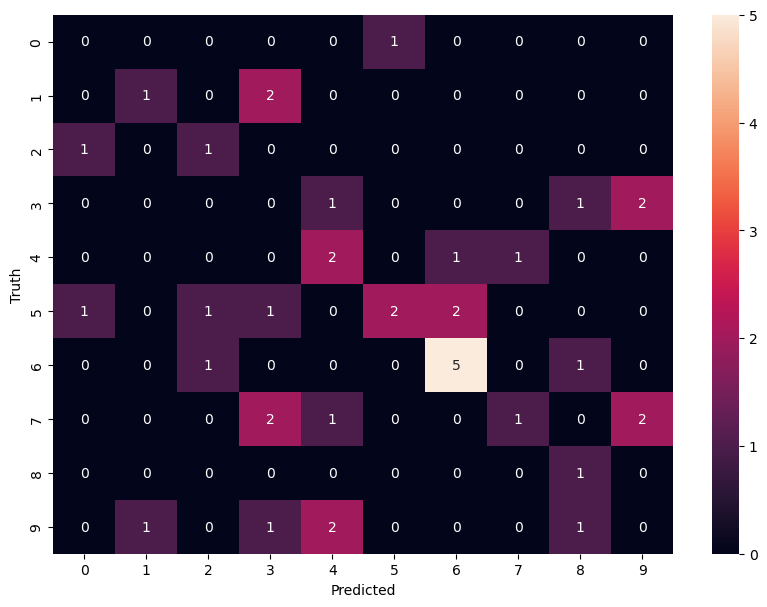

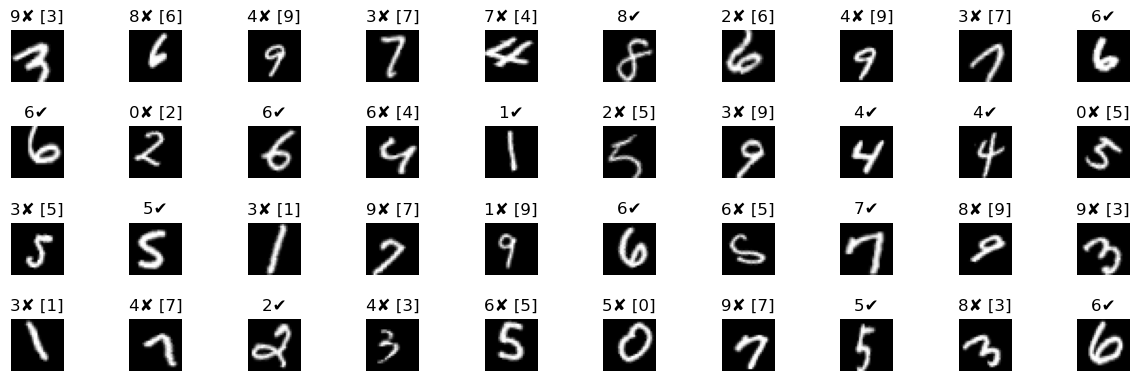

In [306]:
output_from_logistic_regression = log_reg.predict(test_images)
print(classification_report(test_labels, output_from_logistic_regression))
show_confusion_matrix(test_labels, output_from_logistic_regression)
show_digits_classification_result(test_images, test_labels, output_from_logistic_regression)

### Random forest

C:\Users\dexp\miniconda3\envs\env-tf\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\dexp\miniconda3\envs\env-tf\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dexp\miniconda3\envs\env-tf\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dexp\miniconda3\envs\env-tf\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         3
           2       0.40      1.00      0.57         2
           3       0.00      0.00      0.00         4
           4       0.60      0.75      0.67         4
           5       1.00      0.71      0.83         7
           6       0.86      0.86      0.86         7
           7       0.80      0.67      0.73         6
           8       0.17      1.00      0.29         1
           9       0.67      0.40      0.50         5

    accuracy                           0.68        40
   macro avg       0.65      0.74      0.64        40
weighted avg       0.71      0.68      0.67        40



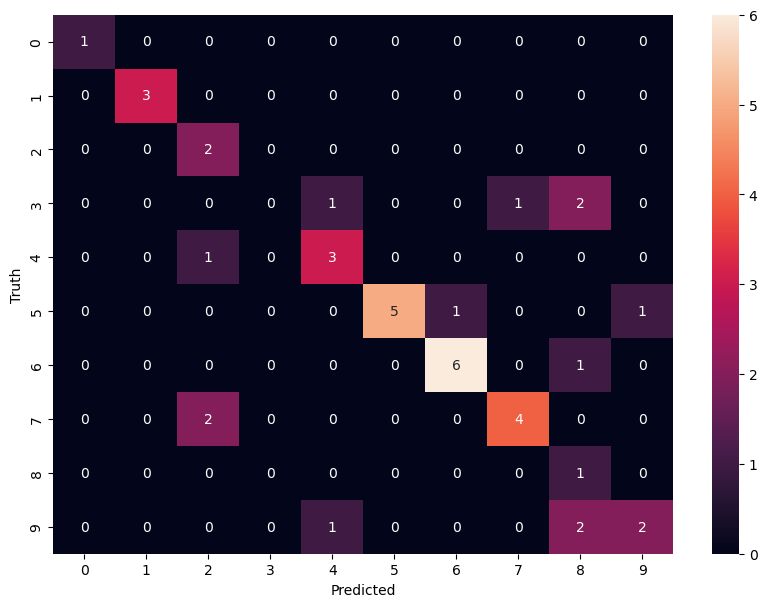

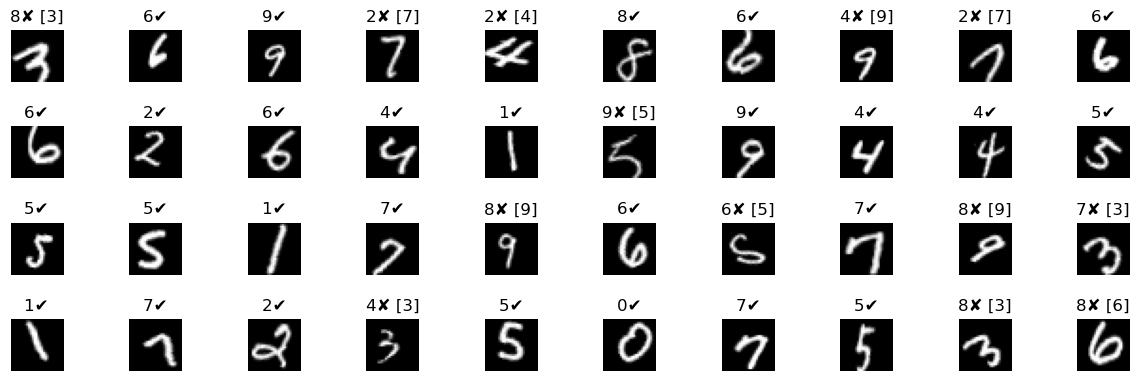

In [307]:
output_from_random_forest = forest_bootstrap.predict(test_images)
print(classification_report(test_labels, output_from_random_forest))
show_confusion_matrix(test_labels, output_from_random_forest)
show_digits_classification_result(test_images, test_labels, output_from_random_forest)

### Histogram-based gradient boosting

C:\Users\dexp\miniconda3\envs\env-tf\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but HistGradientBoostingClassifier was fitted with feature names
  warnings.warn(
C:\Users\dexp\miniconda3\envs\env-tf\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dexp\miniconda3\envs\env-tf\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dexp\miniconda3\envs\env-tf\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-sc

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.67      0.80         3
           2       0.33      0.50      0.40         2
           3       0.00      0.00      0.00         4
           4       0.60      0.75      0.67         4
           5       1.00      0.86      0.92         7
           6       0.75      0.86      0.80         7
           7       1.00      0.33      0.50         6
           8       0.20      1.00      0.33         1
           9       0.43      0.60      0.50         5

    accuracy                           0.62        40
   macro avg       0.58      0.66      0.56        40
weighted avg       0.68      0.62      0.61        40



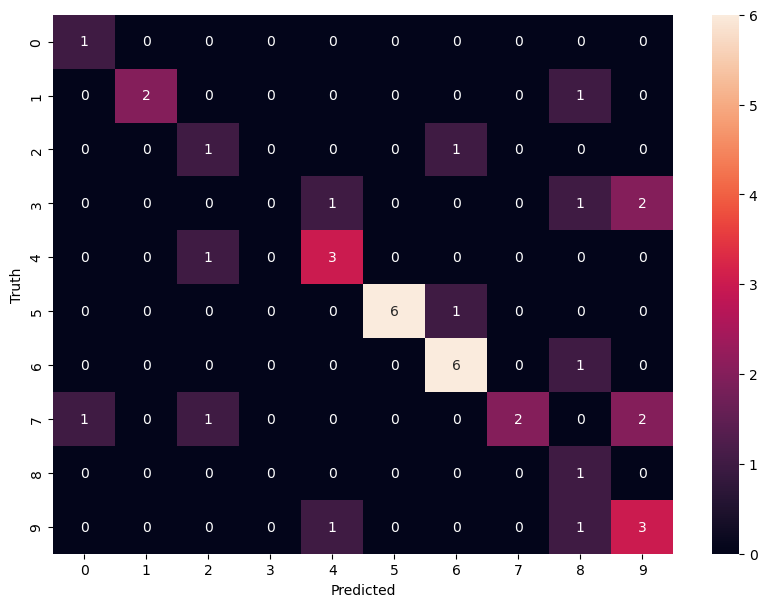

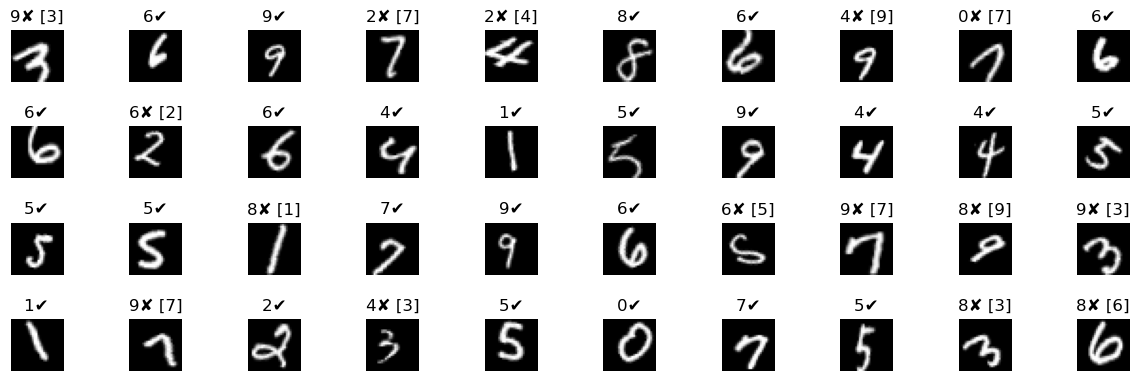

In [308]:
output_from_hist = hist_gradient_boosting.predict(test_images)
print(classification_report(test_labels, output_from_hist))
show_confusion_matrix(test_labels, output_from_hist)
show_digits_classification_result(test_images, test_labels, output_from_hist)

### Voting classifier (hard)

C:\Users\dexp\miniconda3\envs\env-tf\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\dexp\miniconda3\envs\env-tf\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\dexp\miniconda3\envs\env-tf\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
C:\Users\dexp\miniconda3\envs\env-tf\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.75      1.00      0.86         3
           2       0.20      0.50      0.29         2
           3       0.00      0.00      0.00         4
           4       0.43      0.75      0.55         4
           5       1.00      0.43      0.60         7
           6       0.71      0.71      0.71         7
           7       0.60      0.50      0.55         6
           8       0.25      1.00      0.40         1
           9       1.00      0.20      0.33         5

    accuracy                           0.50        40
   macro avg       0.49      0.51      0.43        40
weighted avg       0.63      0.50      0.50        40



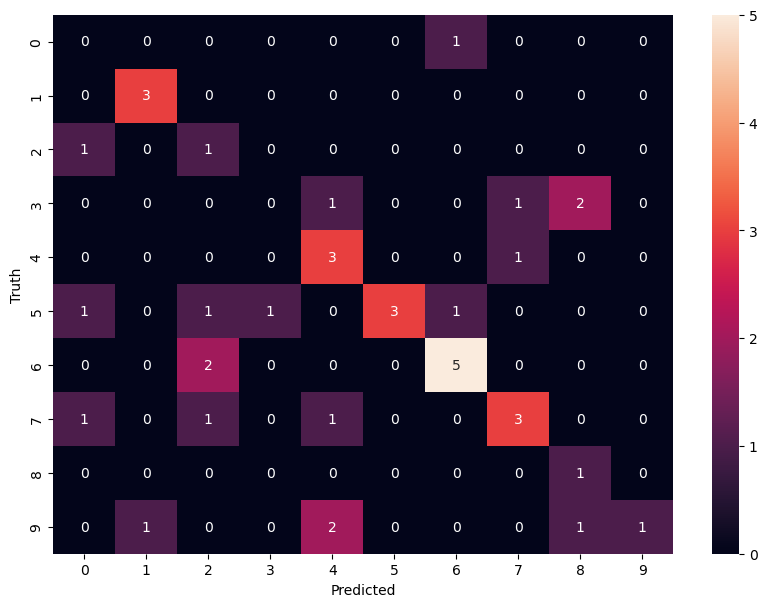

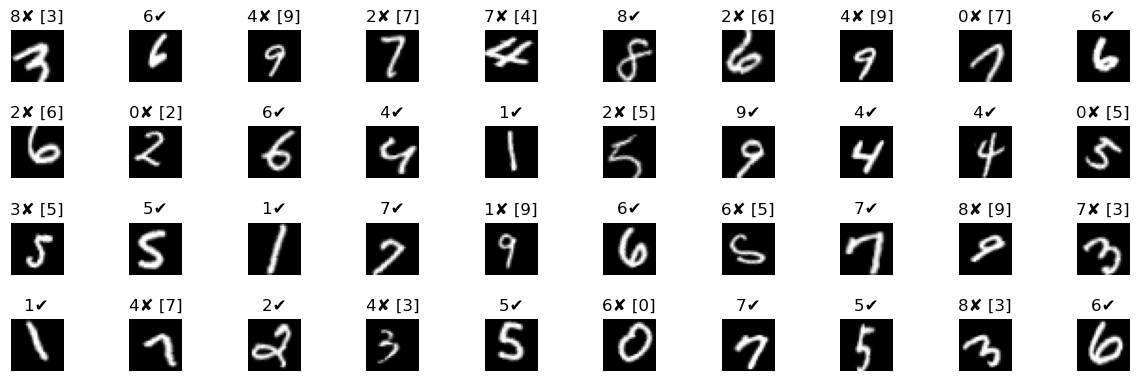

In [322]:
output_from_voting = voting_hard.predict(test_images)
print(classification_report(test_labels, output_from_voting))
show_confusion_matrix(test_labels, output_from_voting)
show_digits_classification_result(test_images, test_labels, output_from_voting)

### Perceptron

2/2 [==============================] - 0s 0s/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      0.67      0.80         3
           2       0.67      1.00      0.80         2
           3       0.00      0.00      0.00         4
           4       0.38      0.75      0.50         4
           5       0.80      0.57      0.67         7
           6       0.75      0.86      0.80         7
           7       1.00      0.50      0.67         6
           8       0.14      1.00      0.25         1
           9       0.33      0.20      0.25         5

    accuracy                           0.57        40
   macro avg       0.61      0.65      0.57        40
weighted avg       0.64      0.57      0.57        40



C:\Users\dexp\miniconda3\envs\env-tf\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dexp\miniconda3\envs\env-tf\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dexp\miniconda3\envs\env-tf\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


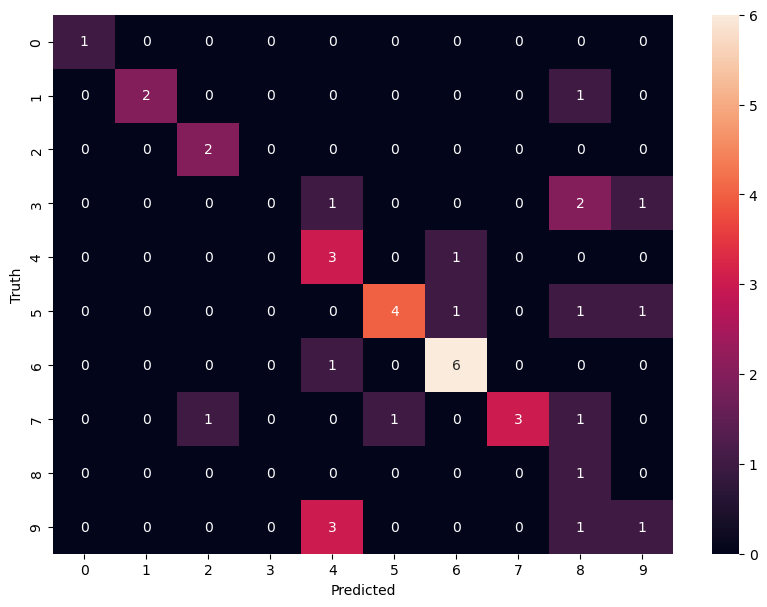

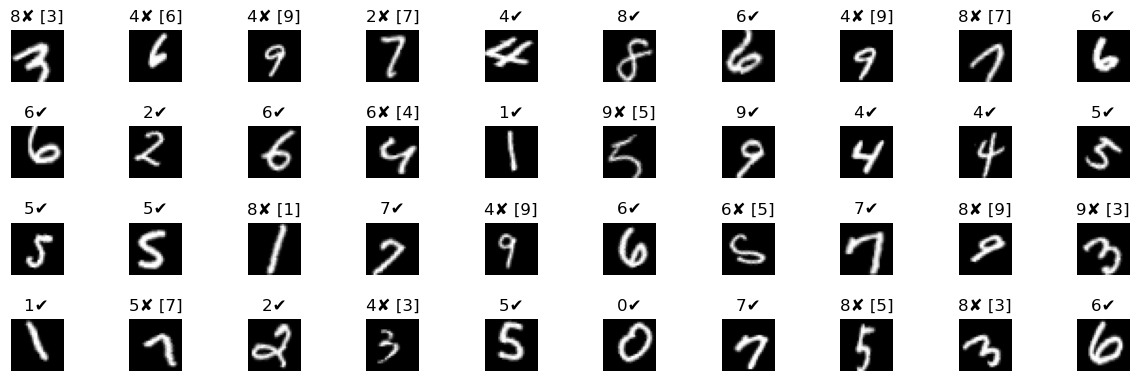

In [323]:
output_from_perceptron = np.argmax(perceptron.predict(test_images), axis = 1)
print(classification_report(test_labels, output_from_perceptron))
show_confusion_matrix(test_labels, output_from_perceptron)
show_digits_classification_result(test_images, test_labels, output_from_perceptron)

### CNN

2/2 [==============================] - 0s 0s/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         3
           2       0.67      1.00      0.80         2
           3       1.00      0.25      0.40         4
           4       1.00      1.00      1.00         4
           5       1.00      0.86      0.92         7
           6       1.00      1.00      1.00         7
           7       0.67      1.00      0.80         6
           8       0.50      1.00      0.67         1
           9       1.00      0.80      0.89         5

    accuracy                           0.88        40
   macro avg       0.88      0.89      0.85        40
weighted avg       0.92      0.88      0.86        40



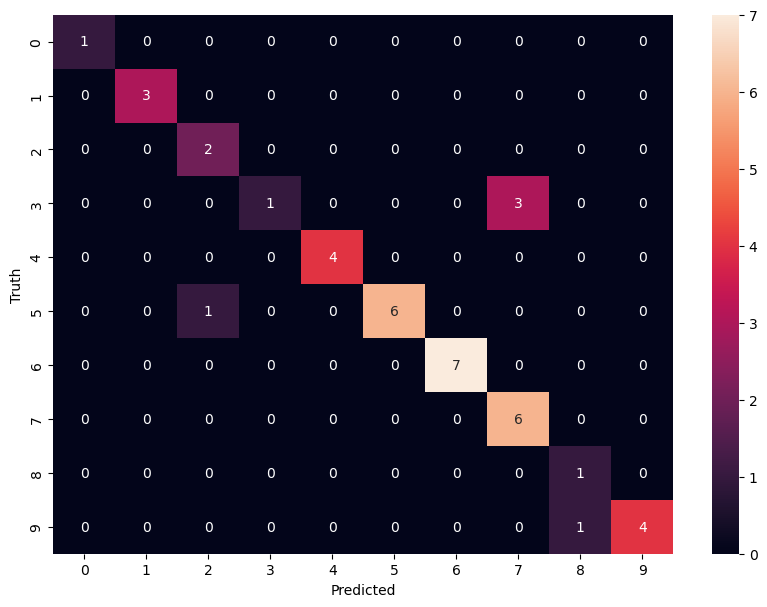

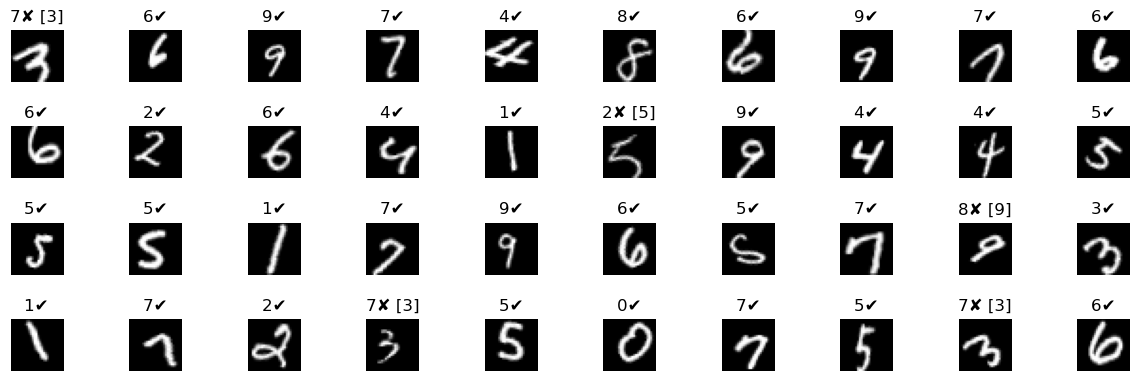

In [324]:
output_from_cnn = np.argmax(cnn.predict(test_images_cnn), axis = 1)
print(classification_report(test_labels, output_from_cnn))
show_confusion_matrix(test_labels, output_from_cnn)
show_digits_classification_result(test_images, test_labels, output_from_cnn)

### CNN with augmentation

2/2 [==============================] - 0s 37ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         7
           6       1.00      1.00      1.00         7
           7       1.00      1.00      1.00         6
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         5

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



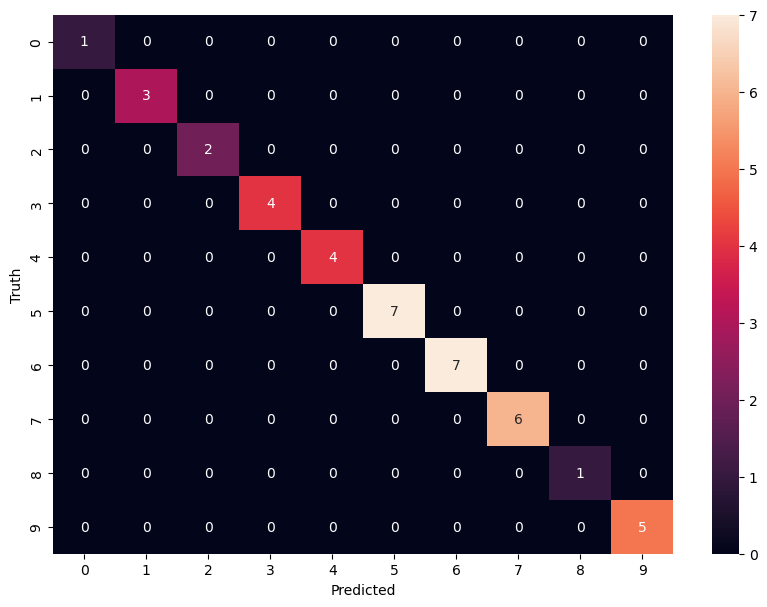

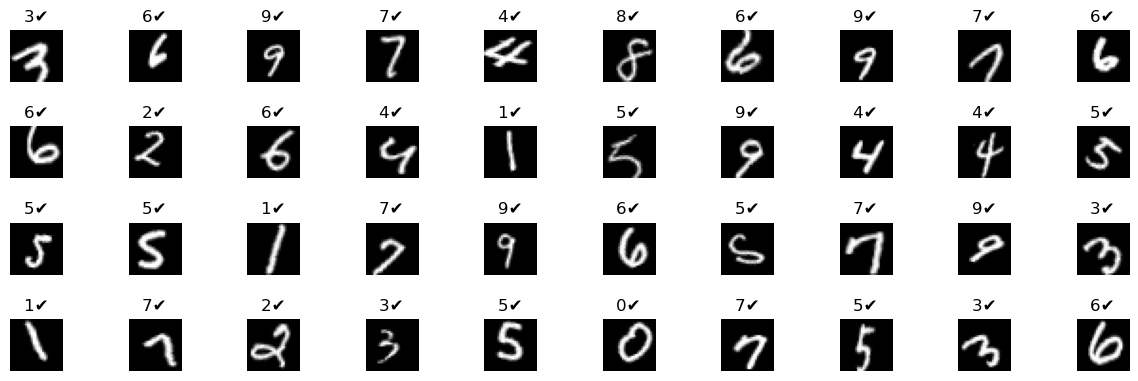

In [325]:
output_from_cnn_aug = np.argmax(cnn_aug.predict(test_images_cnn), axis = 1)
print(classification_report(test_labels, output_from_cnn_aug))
show_confusion_matrix(test_labels, output_from_cnn_aug)
show_digits_classification_result(test_images, test_labels, output_from_cnn_aug)

#### Wrong predictions showcase

In [13]:
prediction = np.argmax(cnn_aug.predict(x_test_cnn), axis = 1)
errors = (prediction - y_test_cnn != 0)
predicted_labels = prediction[errors]
true_labels = y_test_cnn[errors]
images = x_test_cnn[errors]

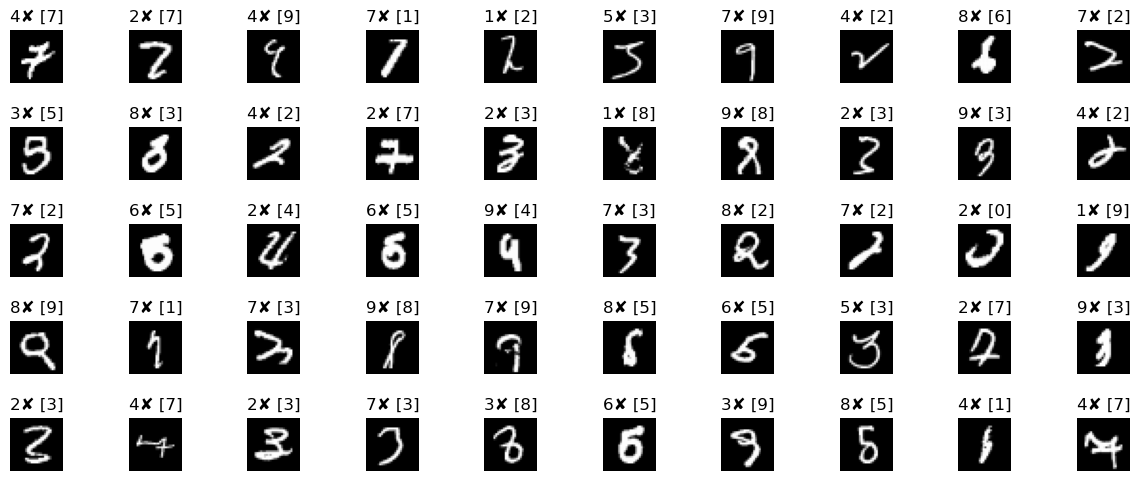

In [14]:
plt.subplots(5, 10, figsize = (12, 5))
plt.tight_layout()
for i in range(0, 50):
    plt.subplot(5, 10, i + 1)
    plt.axis('off')
    result_label = predicted_labels[i]
    real_label = true_labels.iloc[i]
    output_label = f'{result_label}✔️' if real_label == result_label else f'{result_label}✘ [{real_label}]'
    plt.gca().set_title(output_label)
    plt.imshow(images[i].reshape(28, 28), cmap = 'gray')
plt.show()

# Save & load trained models

## Dataset for a test of loaded models

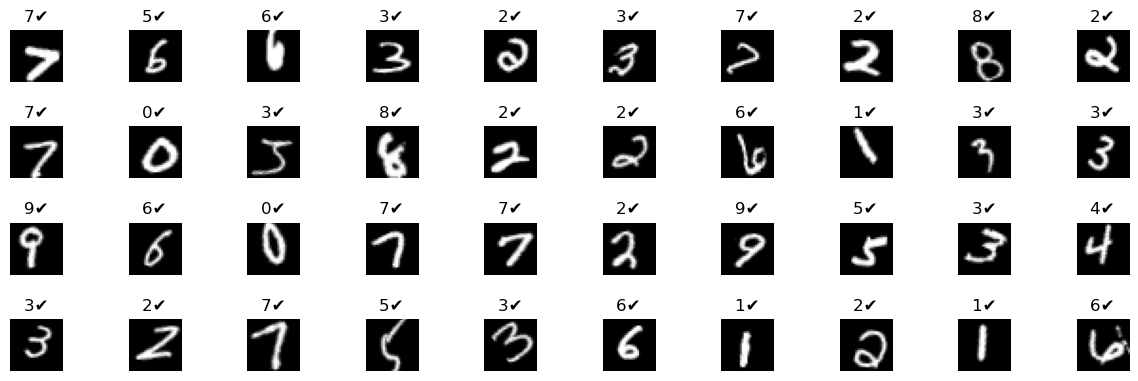

In [326]:
showcase_images, showcase_images_cnn, showcase_labels = make_test_subset(seed = 7015, augmented = True)
show_digits_classification_result(showcase_images, showcase_labels, showcase_labels)

## Logistic regression

C:\Users\dexp\miniconda3\envs\env-tf\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\dexp\miniconda3\envs\env-tf\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dexp\miniconda3\envs\env-tf\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dexp\miniconda3\envs\env-tf\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.00      0.00      0.00         3
           2       0.67      0.50      0.57         8
           3       0.50      0.50      0.50         8
           4       0.00      0.00      0.00         1
           5       0.17      0.33      0.22         3
           6       0.60      0.60      0.60         5
           7       0.75      0.50      0.60         6
           8       0.17      0.50      0.25         2
           9       0.33      0.50      0.40         2

    accuracy                           0.45        40
   macro avg       0.42      0.39      0.38        40
weighted avg       0.51      0.45      0.46        40



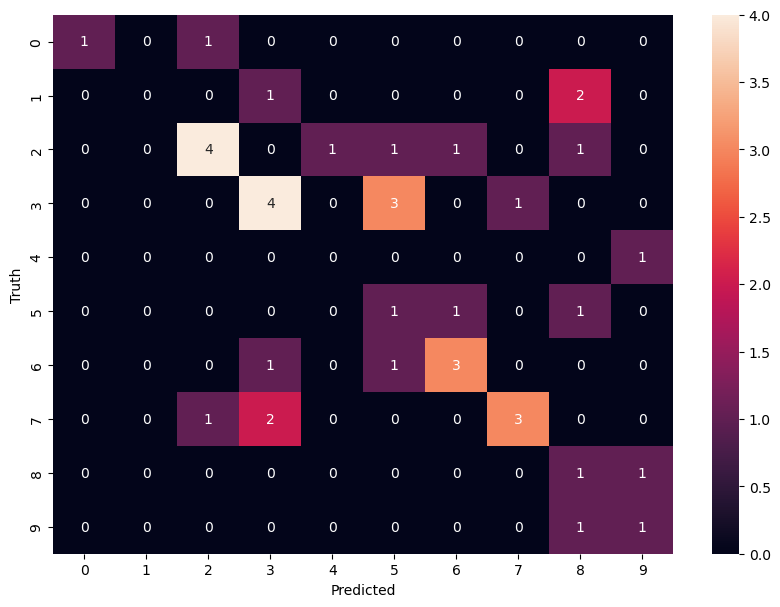

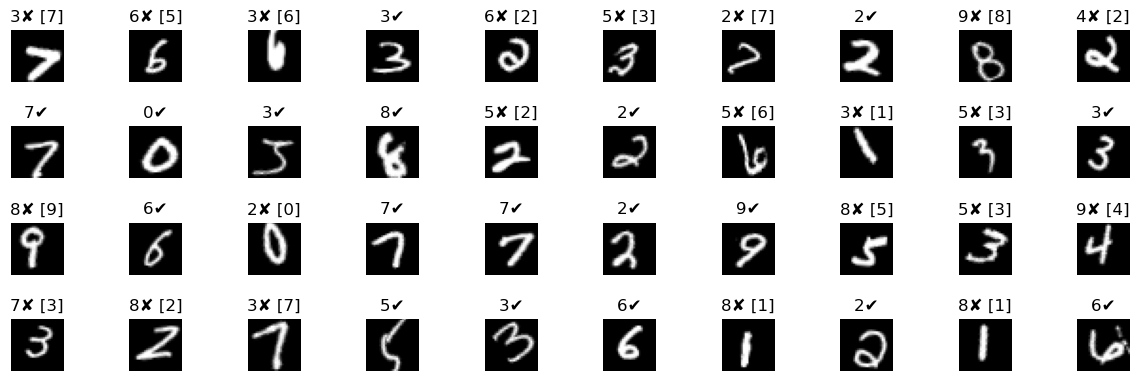

In [327]:
with open('./_hand_written_digits_classifiers/logistic_regression.joblib', 'wb') as f:
    joblib.dump(log_reg, f)
log_reg_loaded = LogisticRegression()
with open('./_hand_written_digits_classifiers/logistic_regression.joblib', 'rb') as f:
    log_reg_loaded = joblib.load(f)

output_from_log_reg_loaded = log_reg_loaded.predict(showcase_images)
print(classification_report(showcase_labels, output_from_log_reg_loaded))
show_confusion_matrix(showcase_labels, output_from_log_reg_loaded)
show_digits_classification_result(showcase_images, showcase_labels, output_from_log_reg_loaded)

## Random forest

C:\Users\dexp\miniconda3\envs\env-tf\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\dexp\miniconda3\envs\env-tf\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dexp\miniconda3\envs\env-tf\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dexp\miniconda3\envs\env-tf\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are 

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.00      0.00      0.00         3
           2       0.64      0.88      0.74         8
           3       0.83      0.62      0.71         8
           4       1.00      1.00      1.00         1
           5       0.00      0.00      0.00         3
           6       0.50      0.60      0.55         5
           7       1.00      0.50      0.67         6
           8       0.29      1.00      0.44         2
           9       0.50      0.50      0.50         2

    accuracy                           0.57        40
   macro avg       0.58      0.56      0.53        40
weighted avg       0.62      0.57      0.56        40



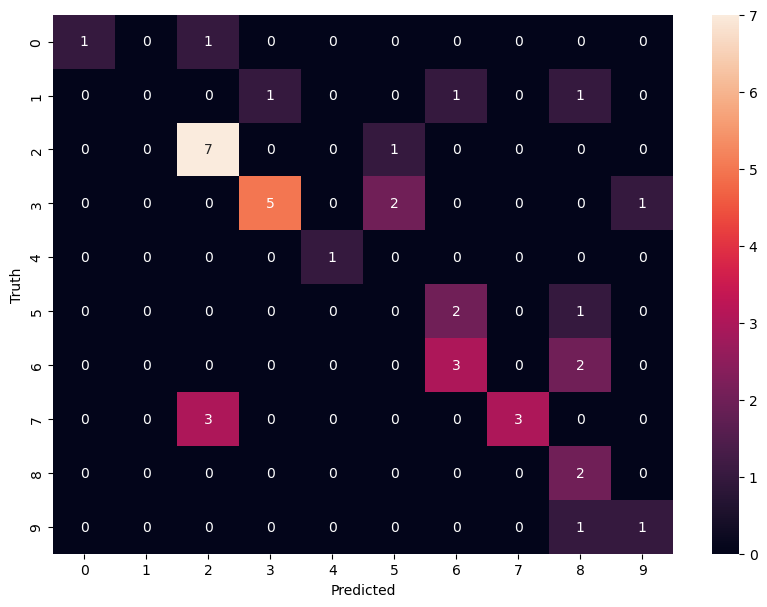

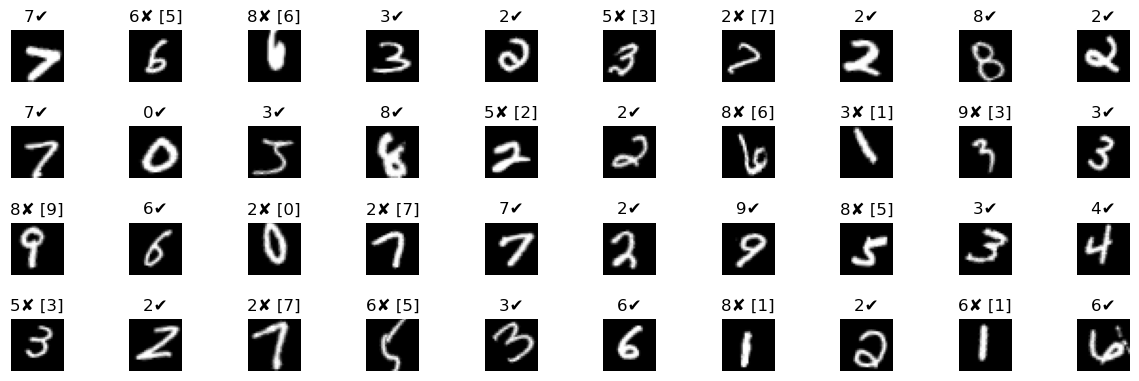

In [330]:
with open('./_hand_written_digits_classifiers/random_forest.joblib', 'wb') as f:
    joblib.dump(forest_bootstrap, f)
forest_loaded = RandomForestClassifier()
with open('./_hand_written_digits_classifiers/random_forest.joblib', 'rb') as f:
    forest_loaded = joblib.load(f)

output_from_forest_loaded = forest_loaded.predict(showcase_images)
print(classification_report(showcase_labels, output_from_forest_loaded))
show_confusion_matrix(showcase_labels, output_from_forest_loaded)
show_digits_classification_result(showcase_images, showcase_labels, output_from_forest_loaded)

## Histogram-based gradient boosting

C:\Users\dexp\miniconda3\envs\env-tf\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but HistGradientBoostingClassifier was fitted with feature names
  warnings.warn(
C:\Users\dexp\miniconda3\envs\env-tf\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dexp\miniconda3\envs\env-tf\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dexp\miniconda3\envs\env-tf\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-sc

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.00      0.00      0.00         3
           2       0.83      0.62      0.71         8
           3       0.64      0.88      0.74         8
           4       0.33      1.00      0.50         1
           5       0.00      0.00      0.00         3
           6       0.50      0.60      0.55         5
           7       0.67      0.33      0.44         6
           8       0.22      1.00      0.36         2
           9       0.00      0.00      0.00         2

    accuracy                           0.53        40
   macro avg       0.42      0.49      0.40        40
weighted avg       0.53      0.53      0.49        40



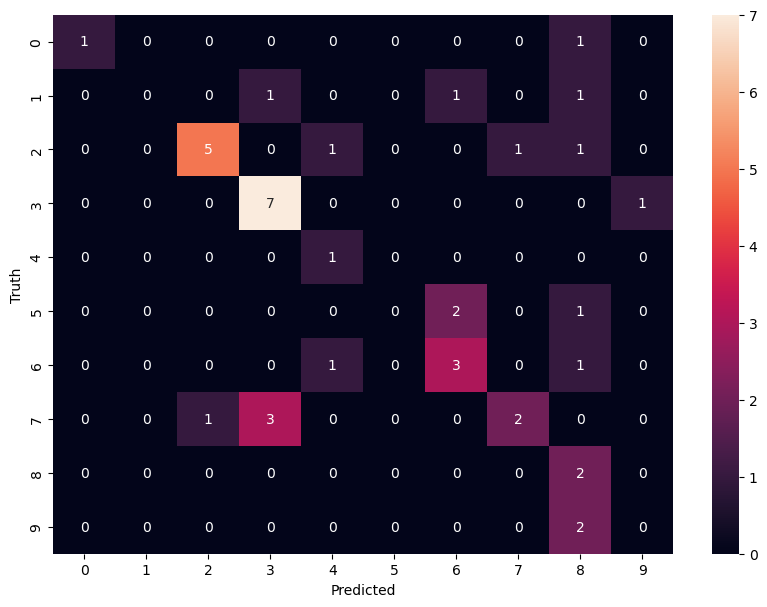

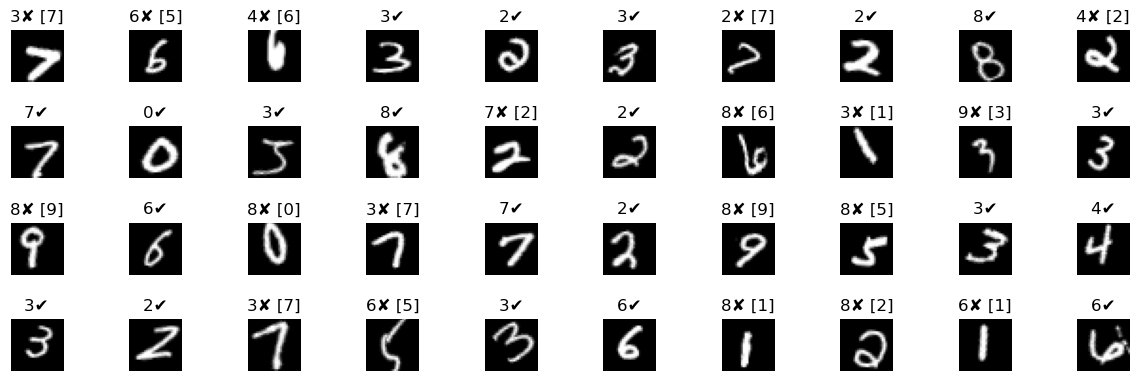

In [332]:
with open('./_hand_written_digits_classifiers/histogram_based_gradient_boosting.joblib', 'wb') as f:
    joblib.dump(hist_gradient_boosting, f)
hist_gradient_boosting_loaded = HistGradientBoostingClassifier()
with open('./_hand_written_digits_classifiers/histogram_based_gradient_boosting.joblib', 'rb') as f:
    hist_gradient_boosting_loaded = joblib.load(f)

output_from_hist_gradient_loaded = hist_gradient_boosting_loaded.predict(showcase_images)
print(classification_report(showcase_labels, output_from_hist_gradient_loaded))
show_confusion_matrix(showcase_labels, output_from_hist_gradient_loaded)
show_digits_classification_result(showcase_images, showcase_labels, output_from_hist_gradient_loaded)

## Voting classifier (hard)

C:\Users\dexp\miniconda3\envs\env-tf\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\dexp\miniconda3\envs\env-tf\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\dexp\miniconda3\envs\env-tf\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
C:\Users\dexp\miniconda3\envs\env-tf\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       1.00      0.33      0.50         3
           2       0.56      0.62      0.59         8
           3       0.71      0.62      0.67         8
           4       0.50      1.00      0.67         1
           5       0.00      0.00      0.00         3
           6       0.50      0.60      0.55         5
           7       1.00      0.50      0.67         6
           8       0.25      0.50      0.33         2
           9       0.50      0.50      0.50         2

    accuracy                           0.53        40
   macro avg       0.60      0.52      0.51        40
weighted avg       0.64      0.53      0.55        40



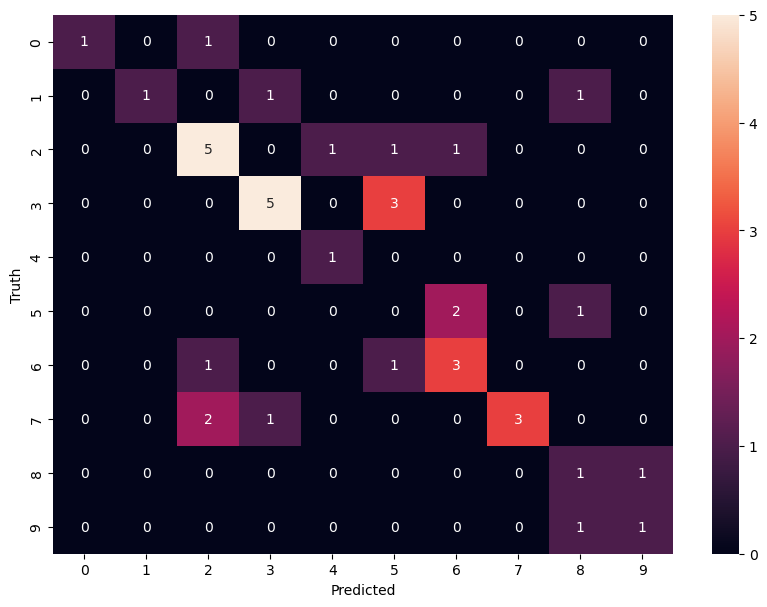

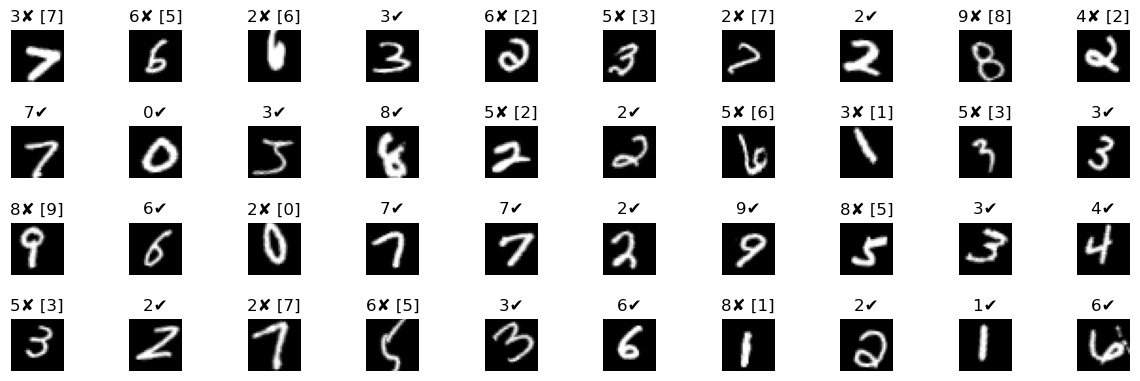

In [334]:
with open('./_hand_written_digits_classifiers/hard_voting.joblib', 'wb') as f:
    joblib.dump(voting_hard, f)
_clf1 = LogisticRegression()
_clf2 = RandomForestClassifier()
_clf3 = GaussianNB()
_clf4 = SVC()
voting_hard_loaded = VotingClassifier(estimators = [('lr', _clf1), ('rf', _clf2), ('gnb', _clf3), ('svc', _clf4)])
with open('./_hand_written_digits_classifiers/hard_voting.joblib', 'rb') as f:
    voting_hard_loaded = joblib.load(f)

output_from_voting_hard_loaded = voting_hard_loaded.predict(showcase_images)
print(classification_report(showcase_labels, output_from_voting_hard_loaded))
show_confusion_matrix(showcase_labels, output_from_voting_hard_loaded)
show_digits_classification_result(showcase_images, showcase_labels, output_from_voting_hard_loaded)

## Perceptron

2/2 [==============================] - 0s 0s/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      0.67      0.80         3
           2       0.67      1.00      0.80         2
           3       0.00      0.00      0.00         4
           4       0.38      0.75      0.50         4
           5       0.80      0.57      0.67         7
           6       0.75      0.86      0.80         7
           7       1.00      0.50      0.67         6
           8       0.14      1.00      0.25         1
           9       0.33      0.20      0.25         5

    accuracy                           0.57        40
   macro avg       0.61      0.65      0.57        40
weighted avg       0.64      0.57      0.57        40



C:\Users\dexp\miniconda3\envs\env-tf\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dexp\miniconda3\envs\env-tf\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dexp\miniconda3\envs\env-tf\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


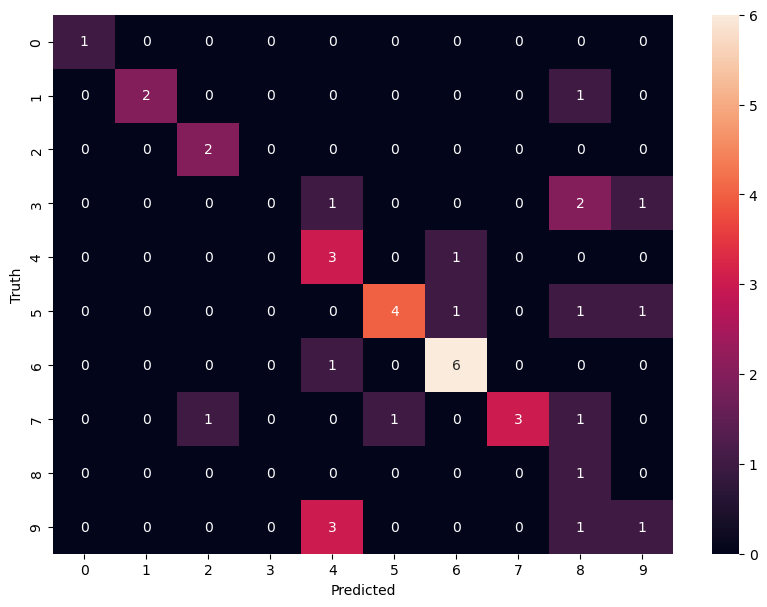

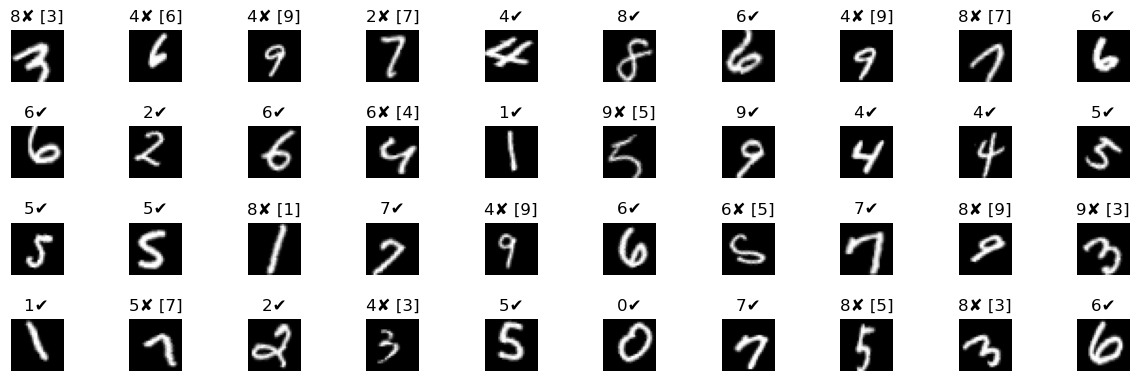

In [336]:
perceptron.save('./_hand_written_digits_classifiers/perceptron.keras')
perceptron_loaded = keras.models.load_model('./_hand_written_digits_classifiers/perceptron.keras')

output_from_perceptron_loaded = np.argmax(perceptron_loaded.predict(test_images), axis = 1)
print(classification_report(test_labels, output_from_perceptron_loaded))
show_confusion_matrix(test_labels, output_from_perceptron_loaded)
show_digits_classification_result(test_images, test_labels, output_from_perceptron_loaded)

## CNN

2/2 [==============================] - 0s 0s/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         3
           2       0.67      1.00      0.80         2
           3       1.00      0.25      0.40         4
           4       1.00      1.00      1.00         4
           5       1.00      0.86      0.92         7
           6       1.00      1.00      1.00         7
           7       0.67      1.00      0.80         6
           8       0.50      1.00      0.67         1
           9       1.00      0.80      0.89         5

    accuracy                           0.88        40
   macro avg       0.88      0.89      0.85        40
weighted avg       0.92      0.88      0.86        40



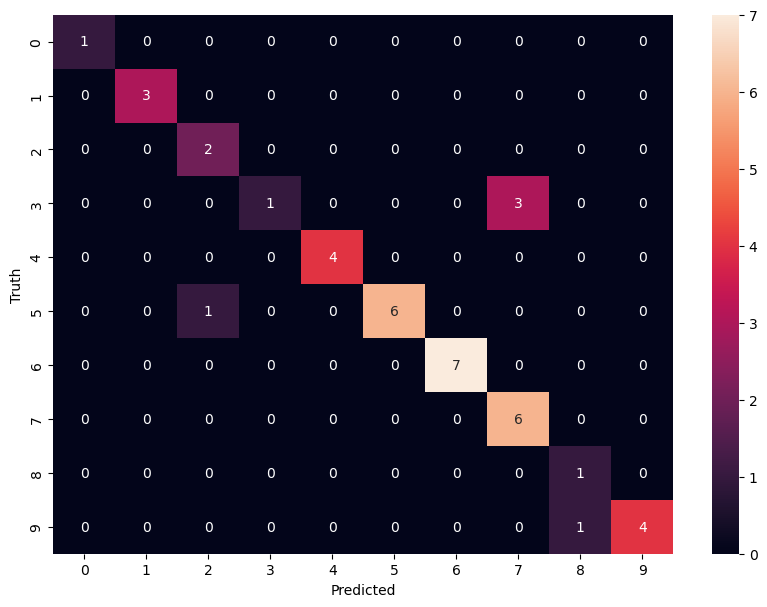

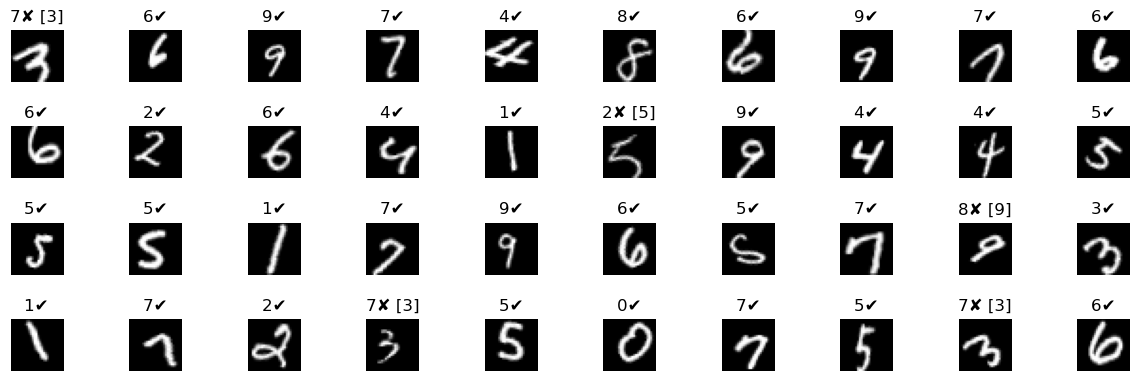

In [339]:
cnn.save('./_hand_written_digits_classifiers/cnn.keras')
cnn_loaded = keras.models.load_model('./_hand_written_digits_classifiers/cnn.keras')

output_from_cnn_loaded = np.argmax(cnn_loaded.predict(test_images_cnn), axis = 1)
print(classification_report(test_labels, output_from_cnn_loaded))
show_confusion_matrix(test_labels, output_from_cnn_loaded)
show_digits_classification_result(test_images, test_labels, output_from_cnn_loaded)

## CNN with augmentation

2/2 [==============================] - 0s 16ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         7
           6       1.00      1.00      1.00         7
           7       1.00      1.00      1.00         6
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         5

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



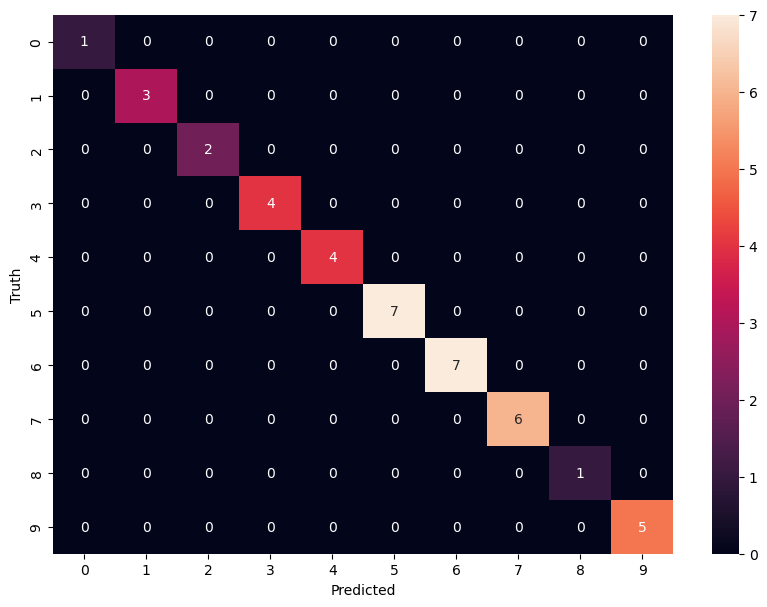

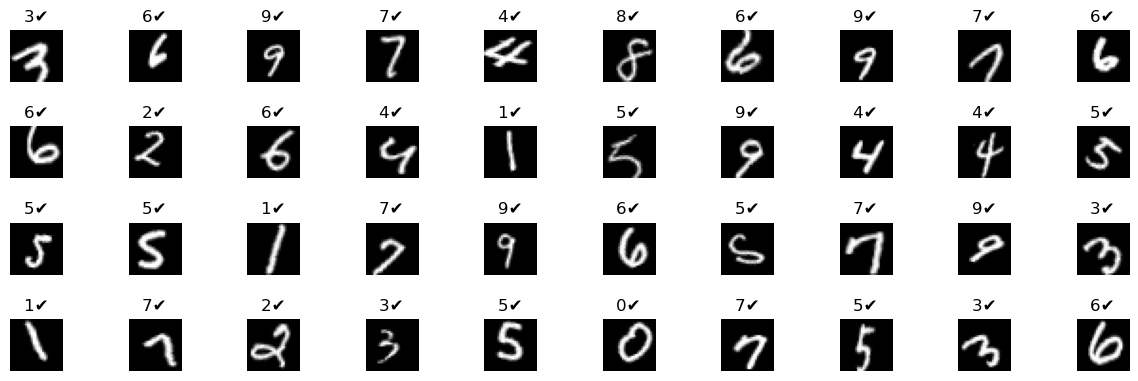

In [340]:
cnn_aug.save('./_hand_written_digits_classifiers/cnn_aug.keras')
cnn_aug_loaded = keras.models.load_model('./_hand_written_digits_classifiers/cnn_aug.keras')

output_from_cnn_aug_loaded = np.argmax(cnn_aug_loaded.predict(test_images_cnn), axis = 1)
print(classification_report(test_labels, output_from_cnn_aug_loaded))
show_confusion_matrix(test_labels, output_from_cnn_aug_loaded)
show_digits_classification_result(test_images, test_labels, output_from_cnn_aug_loaded)